# Machine Learning Project - Open Section - predicting Agreement Reached
## 2024/2025 - Group 16
Sarah Leuthner, 20240581 </br>
Bárbara Capitão, 20211532 </br>
Ricardo Kayseller, 20230450 </br>
Ludovica Collé, 20241449 </br>
Elisa Pacheco, 20240600 </br>

# **Index**
1. [Import Libaries](#imports) </br>
</br>
2. [Data Understanding](#dataunderstanding) </br>
2.1 [Data Exploration](#dataexploration) </br>
2.2 [Checking Incoherences and Anomalies](#checkincoherences)</br>
2.2.1 [Treating Incoherences](#treatingincoherences)</br>
</br>
3. [Data Preprocessing](#datapreprocessing) </br>
3.1 [Splitting Data](#datasplit) </br>
3.2 [Outliers](#outliers) </br>
3.2 [Missing Values](#missingvalues) </br>
3.3 [Outliers](#outliers) </br>
3.4 [Drop Columns](#dropcolumns) </br>
3.5 [Feature Engenireeing](#featureengenireeing) </br>
3.6 [Variable Encoding](#enconding) </br>
3.7 [Scaling](#scaling) </br>
</br>
4. [Feature Selection](#featureselection) </br>
4.1 [Chi Square](#chi)</br>
4.2 [Spearman Correlation](#cor)</br>
4.3 [Decision Tree](#DT) </br>
4.4 [Random Forest](#RF) </br>
4.5 [XGBoosting](#XGB) </br>
4.6 [RFE](#RFE) </br>
4.7 [LASSO](#LASSO) </br>
4.8 [Important Variables from Feature Selection](#importantvariablesFS) </br>
</br>
5. [Modelling](#Modelling) </br>
5.1 [Models Assessment](#modelassement) </br>
5.2 [Models](#models)</br>
5.3 [Combined Models](#combinedmodels)</br>
5.4 [Best Models Hyperparameters Tuning](#hypertunnyng)</br>
</br>
6. [Predictions](#predictions)

<a class="anchor" id="imports">
    
## 1. Import Libaries

</a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import os
import missingno as msno
from scipy import stats

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors

import sqlite3

from sklearn import datasets
import math
from itertools import product
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from datetime import datetime

#Encoding
from sklearn.preprocessing import LabelEncoder


#Data Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
sns.set()


from sklearn.model_selection import GridSearchCV, train_test_split ,RandomizedSearchCV

#Outliers
from collections import Counter

#Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from xgboost import XGBClassifier


#Modeling
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report

#Hypertuning
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [2]:
#Importing the csv file to the notebook
data_set = pd.read_csv(r"C:\Users\Bárbara C\Desktop\Mestrado\Machine lerninig\project_data\train_data.csv")
df = data_set.copy()

In [3]:
test_set = pd.read_csv(r"C:\Users\Bárbara C\Desktop\Mestrado\Machine lerninig\project_data\test_data.csv")
test = test_set.copy()


In [4]:
test.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


In [5]:
# Checking for duplicates in 'Claim Identifier', the dataset index
duplicate_ids = df['Claim Identifier'][df['Claim Identifier'].duplicated()]

print("Duplicate Claim Identifiers:")
for claim_id in duplicate_ids.unique():
    print(claim_id)

duplicates = df[df['Claim Identifier'].duplicated(keep=False)]

duplicates

Duplicate Claim Identifiers:
292668076


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> As we can see, the Claim Identifier 292668076 is duplicated, and the rows are not identical because the 'Assembly Date' differs between them. The best approach is to remove both rows

In [6]:
# Removing all rows with duplicate 'Claim Identifier' values
df = df[~df['Claim Identifier'].isin(duplicate_ids)]

In [7]:
#Seting the index
df = df.set_index('Claim Identifier')
df = df.sort_index()

In [8]:
df.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393066,2019-09-17,64.0,N,2020-01-01,N,1345.97,1954.0,2020-01-01,NaN,HARTFORD FIRE INSURANCE CO,...,97.0,REPETITIVE MOTION,46.0,RUPTURE,38.0,SHOULDER(S),NaN,1.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393667,2019-12-23,54.0,N,2020-01-01,N,0.00,1965.0,2020-01-01,NaN,"DELHAIZE AMERICA, LLC",...,30.0,"SLIP, OR TRIP, DID NOT FALL",10.0,CONTUSION,55.0,ANKLE,12189,0.0,Not Work Related,3.0
5393769,2019-11-14,56.0,N,2020-01-02,N,0.00,0.0,NaN,NaN,SAFETY NATIONAL CASUALTY CORP,...,NaN,NaN,NaN,NaN,NaN,NaN,18426,0.0,Not Work Related,6.0
5393770,2019-12-31,26.0,N,2020-01-02,N,0.00,1993.0,2020-01-02,2019-12-31,STATE INSURANCE FUND,...,12.0,OBJECT HANDLED,10.0,CONTUSION,36.0,FINGER(S),13202,0.0,Not Work Related,5.0


<a class="anchor" id="dataunderstanding">
    
## 2. Data Unterstanding

</a>

<a class="anchor" id="dataexploration">
    
### 2.1 Data Exploration

</a>

In [9]:
#check the dimensions of dataframe
df.shape

(593469, 32)

In [10]:
test.shape

(387975, 30)

In [11]:
#check the columns in dataframe
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [12]:
test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents'],
      dtype='object')

In [13]:
#check the data type of each column and evidence of missing values among many variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593469 entries, 5393066 to 999891667
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593469 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [14]:
#convert the accident date to the type of datatime to get all the values of this variable
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], errors='coerce')
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'])
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'])

In [15]:
test['Accident Date'] = pd.to_datetime(test['Accident Date'], errors='coerce')
test['First Hearing Date'] = pd.to_datetime(test['First Hearing Date'], errors='coerce')
test['Assembly Date'] = pd.to_datetime(test['Assembly Date'], errors='coerce')

test['C-2 Date'] = pd.to_datetime(test['C-2 Date'])
test['C-3 Date'] = pd.to_datetime(test['C-3 Date'])

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982528,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574026.0,42.11427,0.0,31.0,42.0,54.0,117.0,14.256432
Assembly Date,593469,2021-07-19 03:24:46.765442816,2020-01-01 00:00:00,2020-10-26 00:00:00,2021-07-29 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545375.0,491.088321,0.0,0.0,0.0,841.0,2828079.0,6092.91812
Birth Year,544948.0,1886.767604,0.0,1965.0,1977.0,1989.0,2018.0,414.644423
C-2 Date,559466,2021-07-16 20:11:19.865442816,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187245,2021-07-26 21:31:28.449892608,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
First Hearing Date,150798,2022-03-19 05:07:38.218279168,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.207337,1.0,1.0,2.0,4.0,73.0,2.832303
Industry Code,564068.0,58.645305,11.0,45.0,61.0,71.0,92.0,19.644175


In [17]:
df.describe(include="O").T

,count,unique,top,freq
Alternative Dispute Resolution,574026,3,N,571412
Attorney/Representative,574026,2,N,392291
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505
District Name,574026,8,NYC,270779
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


<a class="anchor" id="treatingincoherences">
    
### 2.2 Treating Incoherences

</a>


In [18]:
valid_codes = [
    10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 
    21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 30.0, 31.0, 32.0, 33.0, 34.0, 
    35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 
    46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0, 50.0, 51.0, 52.0, 
    53.0, 54.0, 55.0, 56.0, 57.0
]

invalid_codes_in_df = df[~df['WCIO Part Of Body Code'].isin(valid_codes)]['WCIO Part Of Body Code'].unique()

print("Values that are not in the 'valid_codes list':", invalid_codes_in_df)

Values that are not in the 'valid_codes list': [nan -9. 90. 91. 65. 66. 58. 99. 64.]


In [19]:
def filter_zip_codes(zip_codes):
    valid_zip_codes = []
    invalid_zip_codes = []
    
    for code in zip_codes:
        if isinstance(code, str):
            code = code.strip()
            
            #check for valid USA ZIP code (#####)
            if len(code) == 5 and code.isdigit():
                valid_zip_codes.append(code)
                
            #check for valid Canadian Postal Code (A#A #A#)
            elif len(code) == 7 and code[3] == ' ' and code[0:1].isalpha() and code[1:2].isdigit() and code[2:3].isalpha() and \
                 code[4:5].isdigit() and code[5:6].isalpha() and code[6:7].isdigit():
                valid_zip_codes.append(code)
            else:
                invalid_zip_codes.append(code)
        else:
            invalid_zip_codes.append(code)

    return valid_zip_codes, invalid_zip_codes

valid_zip_codes, invalid_zip_codes = filter_zip_codes(df['Zip Code'])

unique_invalid_zip_codes = pd.Series(invalid_zip_codes).unique().tolist()
print("Unique Invalid ZIP Codes:", unique_invalid_zip_codes)

Unique Invalid ZIP Codes: [nan, 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', 14817.0, 13905.0, 12839.0, 12779.0, 11787.0, 12180.0, 10990.0, 13083.0, 11725.0, 14701.0, 11746.0, 14211.0, 11717.0, 11729.0, 14132.0, 11720.0, 13733.0, 11738.0, 12721.0, 12804.0, 14108.0, 13421.0, 12189.0, 12776.0, 14904.0, 10940.0, 11706.0, 12866.0, 11355.0, 32940.0, 10465.0, 11561.0, 11234.0, 11370.0, 10305.0, 13212.0, 14609.0, 11221.0, 10552.0, 11235.0, 11207.0, 11209.0, 1121

In [20]:
valid_zip_codes = pd.Series(valid_zip_codes).unique().tolist()
print(valid_zip_codes)

['14569', '12189', '18426', '13202', '14086', '12150', '13354', '13068', '14743', '14517', '14420', '11701', '13032', '13669', '11704', '14580', '14606', '13092', '13203', '14614', '13212', '14830', '12569', '14202', '13476', '11950', '14025', '14428', '11788', '11746', '13694', '14004', '14048', '11776', '13326', '14108', '14609', '11779', '11941', '14423', '14883', '11764', '14171', '14464', '11742', '13108', '14304', '14903', '11717', '14701', '14623', '11784', '13029', '14094', '13102', '11967', '14170', '14622', '14478', '11754', '13088', '14223', '13165', '14612', '11772', '12550', '85750', '13790', '14075', '14620', '14527', '11796', '13662', '10512', '13435', '14891', '14213', '11756', '13646', '12603', '12205', '12589', '14621', '11769', '12801', '12306', '12116', '12208', '11550', '11428', '11377', '10475', '07010', '10703', '10314', '11206', '11208', '10462', '10466', '10473', '11378', '11101', '08872', '12533', '12534', '12771', '12019', '06422', '10804', '10452', '10128', 

In [21]:
# Remove '.0' from invalid zip codes
cleaned_zip_codes = []

for code in invalid_zip_codes:
    if isinstance(code, float) and code.is_integer():
        cleaned_zip_codes.append(str(int(code)))  # Convert to int to remove '.0'
    else:
        cleaned_zip_codes.append(str(code))  # Keep other codes as is

unique_cleaned_zip_codes = pd.Series(cleaned_zip_codes).unique().tolist()
print("Cleaned ZIP Codes:", unique_cleaned_zip_codes)

Cleaned ZIP Codes: ['nan', 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', '14817', '13905', '12839', '12779', '11787', '12180', '10990', '13083', '11725', '14701', '11746', '14211', '11717', '11729', '14132', '11720', '13733', '11738', '12721', '12804', '14108', '13421', '12189', '12776', '14904', '10940', '11706', '12866', '11355', '32940', '10465', '11561', '11234', '11370', '10305', '13212', '14609', '11221', '10552', '11235', '11207', '11209', '11218', 

In [22]:
invalid_zip_codes = []

for code in unique_cleaned_zip_codes:
    #check if the zip code does not have exactly 5 characters or is not numeric
    if not (len(code) == 5 and code.isnumeric()):
        invalid_zip_codes.append(code)

print(invalid_zip_codes)

['nan', 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', '7822', '7047', '6482', '7032', '7062', '7104', '6763', '7070', '7040', '6820', '7882', '7726', '7052', '7421', '7642', '7660', '7728', '7103', '6610', '6810', '7601', '7083', '7093', '7302', '8527', '5478', '7632', '6606', '7738', '8857', '8618', '7306', '7304', '677', '7458', '7834', '7018', '7011', '7624', '7603', '6401', '6830', '7036', '8863', '7206', '7073', '7105', '7002', '7305', '7108', '7463',

In [23]:
df["Agreement Reached"].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

In [24]:
#replacing specific strings with np.nan in the entire DataFrame
df = df.replace('nan', np.nan)
df = df.replace('UK', np.nan)
df = df.replace('U', np.nan)
df['County of Injury'] = df['County of Injury'].replace('UNKNOWN', np.nan)

df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].replace([-9.0, 90.0, 91.0, 65.0, 66.0, 58.0, 99.0, 64.0],np.nan)

df['Birth Year'] = df['Birth Year'].replace([0.0], np.nan)
df['Age at Injury'] = df['Age at Injury'].replace([0.0], np.nan)

In [25]:
test = test.replace('nan', np.nan)
test = test.replace('UK', np.nan)
test = test.replace('U', np.nan)
test['County of Injury'] = test['County of Injury'].replace('UNKNOWN', np.nan)

test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].replace([-9.0, 90.0, 91.0, 65.0, 66.0, 58.0, 99.0, 64.0],np.nan)

test['Birth Year'] = test['Birth Year'].replace([0.0], np.nan)
test['Age at Injury'] = test['Age at Injury'].replace([0.0], np.nan)

In [26]:
# replacing invalid zip codes with NaN
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if x in invalid_zip_codes else x)
test['Zip Code'] = test['Zip Code'].apply(lambda x: np.nan if x in invalid_zip_codes else x)

In [27]:
df['Carrier Name'] = df['Carrier Name'].str.replace('.', '', regex = False).str.replace(',', '', regex = False)
test['Carrier Name'] = test['Carrier Name'].str.replace('.', '', regex = False).str.replace(',', '', regex = False)

In [28]:
initial_row_count = len(df)

invalid_accident_date_condition = (
    (df['Accident Date'] > df['C-2 Date']) |
    (df['Accident Date'] > df['C-3 Date']) |
    (df['Accident Date'] > df['Assembly Date']) |
    (df['Accident Date'] > df['First Hearing Date'])
)

#set Accident Date to nan for invalid rows
df.loc[invalid_accident_date_condition, 'Accident Date'] = np.nan

final_row_count = len(df)
rows_affected = invalid_accident_date_condition.sum()
percentage_affected = (rows_affected / initial_row_count) * 100

print(f"Percentage of rows affected: {percentage_affected:.2f}%")

Percentage of rows affected: 0.29%


In [29]:
invalid_accident_date_condition_test = (
    (test['Accident Date'] > test['C-2 Date']) |
    (test['Accident Date'] > test['C-3 Date']) |
    (test['Accident Date'] > test['Assembly Date']) |
    (test['Accident Date'] > test['First Hearing Date'])
)

test.loc[invalid_accident_date_condition_test, 'Accident Date'] = np.nan

In [30]:
#We decided to drop all rows that contain only the 'Assembly Date' and the index 'Claim Identifier'
columns_to_check = ['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
                    'Attorney/Representative', 'Average Weekly Wage',
                    'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
                    'Claim Injury Type', 'County of Injury',
                    'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
                    'IME-4 Count', 'Industry Code', 'Industry Code Description',
                    'Medical Fee Region', 'OIICS Nature of Injury Description',
                    'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
                    'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
                    'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
                    'Agreement Reached', 'WCB Decision', 'Number of Dependents']

condition = df[columns_to_check].isna().all(axis=1)

df = df[~condition]

final_row_count = len(df)

percentage_dropped = ((initial_row_count - final_row_count) / initial_row_count) * 100
print(f"Percentage of rows dropped: {percentage_dropped:.2f}%")

Percentage of rows dropped: 3.28%


In [31]:
#check the % of missing values of each variable
missing_values = df.isna().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

missing_data_sorted = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data_sorted)

                                    Missing Values  Missing Percentage
OIICS Nature of Injury Description          574026          100.000000
IME-4 Count                                 441223           76.864637
First Hearing Date                          423228           73.729761
C-3 Date                                    386781           67.380397
WCIO Part Of Body Code                      107173           18.670409
Birth Year                                   54159            9.434938
Medical Fee Region                           33473            5.831269
Zip Code                                     28986            5.049597
Average Weekly Wage                          28651            4.991237
WCIO Part Of Body Description                17082            2.975823
WCIO Nature of Injury Description            15657            2.727577
WCIO Nature of Injury Code                   15657            2.727577
WCIO Cause of Injury Description             15640            2.724615
WCIO C

<a class="anchor" id="datapreprocessing">

## 3. Data Preprocessing

</a>

<a class="anchor" id="datasplit">

### 3.1 Split Data

</a>

In [32]:
target = df['Agreement Reached']
df.drop(['Agreement Reached'], axis=1,  inplace=True)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(df, target,
                                                 train_size=0.75,
                                                 stratify = target,
                                                 random_state = 42)

<a class="anchor" id="outliers">

### 3.2 Outliers

</a>

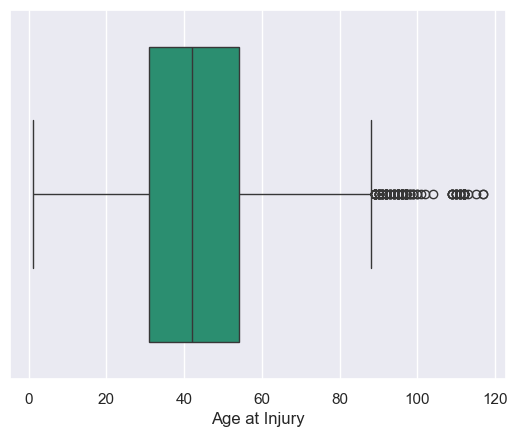

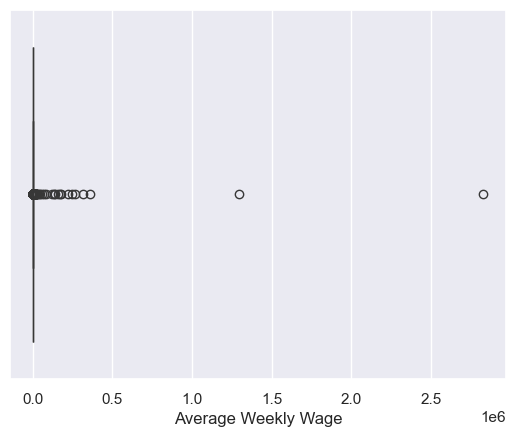

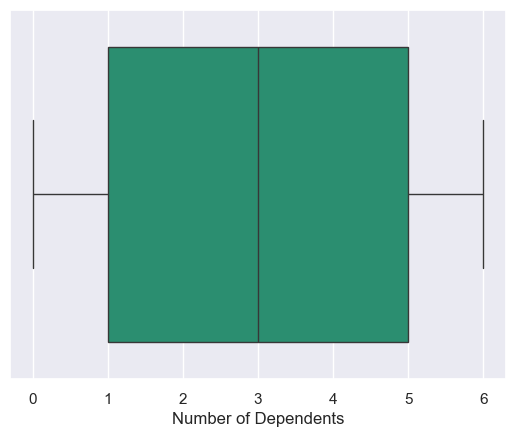

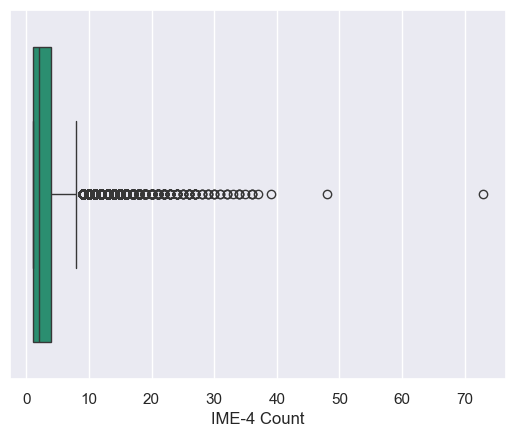

In [34]:
numerical_features = ["Age at Injury", "Average Weekly Wage", "Number of Dependents", 'IME-4 Count']

#plot a boxplot for each column
for i in X_train[numerical_features]:
    sns.boxplot(data = X_train, x = i, palette = 'Dark2')
    plt.show()

In [35]:
features = ["Age at Injury", "Average Weekly Wage", "IME-4 Count"]

percentiles_99 = {}

for feature in features:
    percentile_99 = np.percentile(X_train[feature].dropna(), 99.95)
    percentiles_99[feature] = percentile_99
    print(f"99th Percentile for {feature}: {percentile_99}")


99th Percentile for Age at Injury: 86.0
99th Percentile for Average Weekly Wage: 5306.87070000016
99th Percentile for IME-4 Count: 24.0


In [36]:
percentiles_1 = {}

for feature in features:
    percentile_1 = np.percentile(X_train[feature].dropna(), 0.05)
    percentiles_1[feature] = percentile_1
    print(f"1th Percentile for {feature}: {percentile_1}")

1th Percentile for Age at Injury: 16.0
1th Percentile for Average Weekly Wage: 0.0
1th Percentile for IME-4 Count: 1.0


In [37]:
filters = (
    
    (X_train['Age at Injury']<=89)
    &
    (X_train['Average Weekly Wage']<=10000)
    &
    (X_train['Age at Injury']>=10)

)                              

X_train = X_train[filters]
y_train = y_train[filters]


<a class="anchor" id="missingvalues">
    
### 3.3 Missing Values

</a>

In [38]:
datasets = [X_train, X_val, test]

In [39]:
X_train['C-2 Date Binary'] = X_train['C-2 Date'].notna().astype(int)
X_val['C-2 Date Binary'] = X_val['C-2 Date'].notna().astype(int)
test['C-2 Date Binary'] = test['C-2 Date'].notna().astype(int)

In [40]:
columns = ['Accident Date','C-2 Date'] 
for col in columns:
    #Calculating the average difference in days between the dates
    mean_days_diff = (X_train['Assembly Date'] - X_train[col]).dt.days.mean()
    print(f"Average days between {col} and Assembly Date: {mean_days_diff} days")
    for df in datasets: 
        df[col] = df.apply(
            lambda row: row['Assembly Date'] - pd.Timedelta(days=mean_days_diff) if pd.isnull(row[col]) else row[col], axis=1)
        
X_train[['Accident Date', 'Assembly Date', 'C-2 Date']].head()

Average days between Accident Date and Assembly Date: 79.12973232588308 days
Average days between C-2 Date and Assembly Date: 3.741649494417022 days


,Accident Date,Assembly Date,C-2 Date
Claim Identifier,,,
5707041,2021-04-09,2021-04-23,2021-04-23
5606050,2020-11-20,2020-11-24,2020-11-23
5690972,2021-03-26,2021-03-30,2021-03-30
5976821,2022-01-06,2022-04-27,2022-04-27
5595049,2020-10-08,2020-11-09,2020-11-02


In [41]:
#Age at injury
# as accident date and assembly date have on average only some mothns diference and the age at injury is the age in accidente date
# we can calculate the age by finding the year difference between Assembly Date and Birth Year
# Only for rows where Age at Injury is missing

for df in datasets:
    mask = df['Age at Injury'].isna() & df['Accident Date'].notna() & df['Birth Year'].notna()
    df.loc[mask, 'Age at Injury'] = df.loc[mask, 'Accident Date'].dt.year - df.loc[mask, 'Birth Year']

median_age_injury = X_train['Age at Injury'].median()

for df in datasets:
            df['Age at Injury'] = df['Age at Injury'].fillna(median_age_injury).apply(np.floor).astype(int)
X_train[['Accident Date', 'Birth Year', 'Age at Injury']].tail(70)

,Accident Date,Birth Year,Age at Injury
Claim Identifier,,,
5537703,2020-08-13,1995.0,24
5674394,2021-03-04,NaN,57
5429270,2019-12-08,1973.0,46
5976697,2021-11-24,1973.0,48
5870054,2021-11-21,NaN,29
...,...,...,...
5733434,2021-05-27,1961.0,59
6137201,2022-11-15,1978.0,44
5543100,2020-07-28,1958.0,61


In [42]:
median_col = X_train['Age at Injury'].median()

for df in datasets:
    df['Age at Injury'] = df['Age at Injury'].fillna(median_col).apply(np.floor).astype(int)
   

In [43]:
columns = ['Alternative Dispute Resolution'] 

for col in columns:
    col_mode = X_train[col].mode()[0]
    print(col_mode)
    for df in datasets:
            df[col] = df[col].fillna(col_mode)
    

N


In [44]:
def impute_mode_grouping_by_category(col_1, col_2, row, col_2_mode, general_mode):
    if pd.isna(row[col_1]):
        if pd.notna(row[col_2]):
            return col_2_mode.get(row[col_2], general_mode)  
        else:
            return general_mode
    else:
        return row[col_1]

In [45]:
columns = ['Carrier Type', 'Carrier Name', 'Gender']

for col_1 in columns:
    industry_mode = X_train.groupby('Industry Code')[col_1].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    
    general_mode = X_train[col_1].mode().iloc[0] 
    print(col_1)
    print(general_mode)


    for df in datasets:
        df[col_1] = df.apply(lambda row: impute_mode_grouping_by_category(col_1=col_1, col_2='Industry Code', row=row, col_2_mode=industry_mode, general_mode=general_mode), axis=1)
    
    print(X_train[col_1])

Carrier Type
1A. PRIVATE
Claim Identifier
5707041        1A. PRIVATE
5606050        1A. PRIVATE
5690972        1A. PRIVATE
5976821        1A. PRIVATE
5595049        1A. PRIVATE
                ...       
5733434    3A. SELF PUBLIC
6137201    3A. SELF PUBLIC
5543100        1A. PRIVATE
6142924        1A. PRIVATE
5543035    3A. SELF PUBLIC
Name: Carrier Type, Length: 405140, dtype: object
Carrier Name
STATE INSURANCE FUND
Claim Identifier
5707041              NATIONAL CASUALTY CO
5606050         OLD REPUBLIC INSURANCE CO
5690972        NORGUARD INSURANCE COMPANY
5976821    HARTFORD INS CO OF THE MIDWEST
5595049        HEREFORD INSURANCE COMPANY
                        ...              
5733434         WELLSVILLE CENTRAL SCHOOL
6137201        CITY OF ROCHESTER BD OF ED
5543100         EVEREST PREMIER INSURANCE
6142924      STARR SPECIALTY INSURANCE CO
5543035             NYC TRANSIT AUTHORITY
Name: Carrier Name, Length: 405140, dtype: object
Gender
M
Claim Identifier
5707041    M
5606050  

In [46]:
#County of Injury
district_mode = X_train.groupby('District Name')['County of Injury'].apply(lambda z: z.mode().iloc[0] if not z.mode().empty else None)

county_general_mode = X_train['County of Injury'].mode().iloc[0]

for df in datasets:
    df['County of Injury'] = df.apply(lambda row: impute_mode_grouping_by_category(col_1='County of Injury', col_2='District Name', row=row, col_2_mode=district_mode, general_mode=county_general_mode), axis=1)

print(X_train['County of Injury'])

Claim Identifier
5707041      PUTNAM
5606050    TOMPKINS
5690972    RICHMOND
5976821     SUFFOLK
5595049    RICHMOND
             ...   
5733434    ALLEGANY
6137201      MONROE
5543100      NASSAU
6142924     SUFFOLK
5543035       KINGS
Name: County of Injury, Length: 405140, dtype: object


In [47]:
#Average Weekly Wage    
wage_industry_median = X_train.groupby('Industry Code')['Average Weekly Wage'].median()
print(wage_industry_median)

wage_general_median = X_train['Average Weekly Wage'].median()
print(wage_general_median)

for df in datasets:
        df['Average Weekly Wage'] = df.apply(lambda row: impute_mode_grouping_by_category(col_1='Average Weekly Wage', col_2='Industry Code', row=row, col_2_mode=wage_industry_median, general_mode=wage_general_median), axis=1)


Industry Code
11.0      0.0
21.0      0.0
22.0      0.0
23.0    450.0
31.0      0.0
32.0      0.0
33.0      0.0
42.0      0.0
44.0      0.0
45.0      0.0
48.0    250.0
49.0      0.0
51.0      0.0
52.0      0.0
53.0      0.0
54.0      0.0
55.0      0.0
56.0      0.0
61.0      0.0
62.0      0.0
71.0      0.0
72.0      0.0
81.0      0.0
92.0      0.0
Name: Average Weekly Wage, dtype: float64
0.0


In [48]:
def fill_with_county_and_district_mode(df, target_column, county_column, district_column, global_fallback):
    mode_per_county =  X_train.groupby(county_column)[target_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    mode_per_district =  X_train.groupby(district_column)[target_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    df[target_column] = df.apply(
        lambda row: (
            mode_per_county[row[county_column]] if pd.isnull(row[target_column]) and pd.notnull(row[county_column])
            else mode_per_district[row[district_column]] if pd.isnull(row[target_column]) and pd.notnull(row[district_column])
            else global_fallback if pd.isnull(row[target_column])
            else row[target_column]
        ),
        axis=1
    )
    return df

medical_mode = X_train['Medical Fee Region'].mode()[0]

for df in datasets:
    fill_with_county_and_district_mode(df, target_column = 'Medical Fee Region' , county_column = 'County of Injury' , district_column = 'District Name', global_fallback = medical_mode)

In [49]:
data = {
    'Industry Code': [11.0, 21.0, 22.0, 23.0, 31.0, 32.0, 33.0, 42.0, 44.0, 45.0,
                      48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 61.0, 
                      62.0, 71.0, 72.0, 81.0, 92.0],
    'Industry Code Description': [
        'AGRICULTURE, FORESTRY, FISHING AND HUNTING', 'MINING', 'UTILITIES', 
        'CONSTRUCTION', 'MANUFACTURING', 'MANUFACTURING', 'MANUFACTURING', 
        'WHOLESALE TRADE', 'RETAIL TRADE', 'RETAIL TRADE', 
        'TRANSPORTATION AND WAREHOUSING', 'TRANSPORTATION AND WAREHOUSING', 
        'INFORMATION', 'FINANCE AND INSURANCE', 'REAL ESTATE AND RENTAL AND LEASING', 
        'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES', 
        'MANAGEMENT OF COMPANIES AND ENTERPRISES', 
        'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION', 
        'EDUCATIONAL SERVICES', 'HEALTH CARE AND SOCIAL ASSISTANCE', 
        'ARTS, ENTERTAINMENT, AND RECREATION', 
        'ACCOMMODATION AND FOOD SERVICES', 
        'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)', 
        'PUBLIC ADMINISTRATION'
    ]
}

mode_industry = X_train['Industry Code'].mode()[0] 

X_train['Industry Code'] = X_train['Industry Code'].apply(pd.to_numeric, errors='coerce')
X_val['Industry Code'] = X_val['Industry Code'].apply(pd.to_numeric, errors='coerce')
test['Industry Code'] = test['Industry Code'].apply(pd.to_numeric, errors='coerce')


X_train['Industry Code Description'] = X_train['Industry Code Description'].astype(str)
X_val['Industry Code Description'] = X_val['Industry Code Description'].astype(str)
test['Industry Code Description'] = test['Industry Code Description'].astype(str)


aggregated_df = X_train.groupby('Industry Code').agg(
    {'Industry Code Description': lambda x: sorted(x.unique())}
).reset_index()

industry_dict = dict(zip(aggregated_df['Industry Code'], aggregated_df['Industry Code Description']))

industry_dict

X_train['Industry Code'] = X_train['Industry Code'].fillna(mode_industry)
X_val['Industry Code'] = X_val['Industry Code'].fillna(mode_industry)
test['Industry Code'] = test['Industry Code'].fillna(mode_industry)


industry_dict = dict(zip(X_train['Industry Code'], X_train['Industry Code Description']))

X_train['Industry Code Description'] = X_train['Industry Code'].map(industry_dict)
X_val['Industry Code Description'] = X_val['Industry Code'].map(industry_dict)
test['Industry Code Description'] = test['Industry Code'].map(industry_dict)


X_train[['Industry Code', 'Industry Code Description']].head(10)


,Industry Code,Industry Code Description
Claim Identifier,,
5707041,62.0,HEALTH CARE AND SOCIAL ASSISTANCE
5606050,92.0,PUBLIC ADMINISTRATION
5690972,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
5976821,61.0,EDUCATIONAL SERVICES
5595049,48.0,TRANSPORTATION AND WAREHOUSING
5440915,62.0,HEALTH CARE AND SOCIAL ASSISTANCE
5597852,44.0,RETAIL TRADE
5494761,48.0,TRANSPORTATION AND WAREHOUSING
5412054,92.0,PUBLIC ADMINISTRATION


In [50]:
#We search to get the codes and theirs descriptions

# WCIO Cause of Injury Code and their Descriptions as per the provided order
cause_of_injury_dict = {
    1.0: 'Chemicals',
    2.0: 'Hot Objects or Substances',
    3.0: 'Temperature Extremes',
    4.0: 'Fire or Flame',
    5.0: 'Steam or Hot Fluids',
    6.0: 'Dust, Gases, Fumes or Vapors',
    7.0: 'Welding Operation',
    8.0: 'Radiation',
    9.0: 'Contact With, NOC',
    10.0: 'Machine or Machinery',
    11.0: 'Cold Objects or Substances',
    12.0: 'Object Handled',
    13.0: 'Caught In, Under or Between, NOC',
    14.0: 'Abnormal Air Pressure',
    15.0: 'Broken Glass',
    16.0: 'Hand Tool, Utensil; Not Powered',
    17.0: 'Object Being Lifted or Handled',
    18.0: 'Powered Hand Tool, Appliance',
    19.0: 'Cut, Puncture, Scrape, NOC',
    20.0: 'Collapsing Materials (Slides of Earth)',
    25.0: 'From Different Level (Elevation)',
    26.0: 'From Ladder or Scaffolding',
    27.0: 'From Liquid or Grease Spills',
    28.0: 'Into Openings',
    29.0: 'On Same Level',
    30.0: 'Slip, or Trip, Did Not Fall',
    31.0: 'Fall, Slip or Trip, NOC',
    32.0: 'On Ice or Snow',
    33.0: 'On Stairs',
    40.0: 'Crash of Water Vehicle',
    41.0: 'Crash of Rail Vehicle',
    45.0: 'Collision or Sideswipe With Another Vehicle',
    46.0: 'Collision with a Fixed Object',
    47.0: 'Crash of Airplane',
    48.0: 'Vehicle Upset',
    50.0: 'Motor Vehicle, NOC',
    52.0: 'Continual Noise',
    53.0: 'Twisting',
    54.0: 'Jumping or Leaping',
    55.0: 'Holding or Carrying',
    56.0: 'Lifting',
    57.0: 'Pushing or Pulling',
    58.0: 'Reaching',
    59.0: 'Using Tool or Machinery',
    60.0: 'Strain or Injury By, NOC',
    61.0: 'Wielding or Throwing',
    65.0: 'Moving Part of Machine',
    66.0: 'Object Being Lifted or Handled',
    67.0: 'Sanding, Scraping, Cleaning Operation',
    68.0: 'Stationary Object',
    69.0: 'Stepping on Sharp Object',
    70.0: 'Striking Against or Stepping On, NOC',
    74.0: 'Fellow Worker, Patient or Other Person',
    75.0: 'Falling or Flying Object',
    76.0: 'Hand Tool or Machine in Use',
    77.0: 'Motor Vehicle',
    78.0: 'Moving Parts of Machine',
    79.0: 'Object Being Lifted or Handled',
    80.0: 'Object Handled By Others',
    81.0: 'Struck or Injured, NOC',
    82.0: 'Absorption, Ingestion or Inhalation, NOC',
    83.0: 'Pandemic',
    84.0: 'Electrical Current',
    85.0: 'Animal or Insect',
    86.0: 'Explosion or Flare Back',
    87.0: 'Foreign Matter (Body) in Eye(s)',
    88.0: 'Natural Disasters',
    89.0: 'Person in Act of a Crime',
    90.0: 'Other Than Physical Cause of Injury',
    91.0: 'Mold',
    93.0: 'Gunshot',
    94.0: 'Repetitive Motion',
    95.0: 'Rubbed or Abraded, NOC',
    96.0: 'Terrorism',
    97.0: 'Repetitive Motion',
    98.0: 'Cumulative, NOC',
    99.0: 'Other - Miscellaneous, NOC'
}

mode_value = X_train['WCIO Cause of Injury Code'].mode()[0]  

for df in datasets:
    df['WCIO Cause of Injury Code'] = df['WCIO Cause of Injury Code'].fillna(mode_value)
    df['WCIO Cause of Injury Code'] = pd.to_numeric(df['WCIO Cause of Injury Code'], errors='coerce')
    df['WCIO Cause of Injury Description'] = df['WCIO Cause of Injury Code'].map(cause_of_injury_dict)


X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].head(10)

,WCIO Cause of Injury Code,WCIO Cause of Injury Description
Claim Identifier,,
5707041,56.0,Lifting
5606050,17.0,Object Being Lifted or Handled
5690972,77.0,Motor Vehicle
5976821,27.0,From Liquid or Grease Spills
5595049,50.0,"Motor Vehicle, NOC"
5440915,31.0,"Fall, Slip or Trip, NOC"
5597852,70.0,"Striking Against or Stepping On, NOC"
5494761,98.0,"Cumulative, NOC"
5412054,56.0,Lifting


In [51]:
# WCIO Nature of Injury Code and their Descriptions as per the provided order
nature_of_injury_dict = {
    1.0: 'No Physical Injury',
    2.0: 'Amputation',
    3.0: 'Angina Pectoris',
    4.0: 'Burn',
    7.0: 'Concussion',
    10.0: 'Contusion',
    13.0: 'Crushing',
    16.0: 'Dislocation',
    19.0: 'Electric Shock',
    22.0: 'Enucleation',
    25.0: 'Foreign Body',
    28.0: 'Fracture',
    30.0: 'Freezing',
    31.0: 'Hearing Loss or Impairment',
    32.0: 'Heat Prostration',
    34.0: 'Hernia',
    36.0: 'Infection',
    37.0: 'Inflammation',
    38.0: 'Adverse reaction to a vaccination orinoculation',
    40.0: 'Laceration',
    41.0: 'Myocardial Infarction',
    42.0: 'Poisoning - General (Not OD or Cumulative Injury)',
    43.0: 'Puncture',
    46.0: 'Rupture',
    47.0: 'Severance',
    49.0: 'Sprain or Tear',
    52.0: 'Strain or Tear',
    53.0: 'Syncope',
    54.0: 'Asphyxiation',
    55.0: 'Vascular',
    58.0: 'Vision Loss',
    59.0: 'All Other Specific Injuries, NOC',
    60.0: 'Dust Disease, NOC',
    61.0: 'Asbestosis',
    62.0: 'Black Lung',
    63.0: 'Byssinosis',
    64.0: 'Silicosis',
    65.0: 'Respiratory Disorders',
    66.0: 'Poisoning - Chemical, (Other Than Metals)',
    67.0: 'Poisoning - Metal',
    68.0: 'Dermatitis',
    69.0: 'Mental Disorder',
    70.0: 'Radiation',
    71.0: 'All Other Occupational Disease Injury, NOC',
    72.0: 'Loss of Hearing',
    73.0: 'Contagious Disease',
    74.0: 'Cancer',
    75.0: 'AIDS',
    76.0: 'VDT - Related Diseases',
    77.0: 'Mental Stress',
    78.0: 'Carpal Tunnel Syndrome',
    79.0: 'Hepatitis C',
    83.0: 'COVID-19',
    80.0: 'All Other Cumulative Injury, NOC',
    90.0: 'Multiple Physical Injuries Only',
    91.0: 'Multiple Injuries Including Both Physical and Psychological'
}

mode_value = X_train['WCIO Nature of Injury Code'].mode()[0]

for df in datasets:
    df['WCIO Nature of Injury Code'] = df['WCIO Nature of Injury Code'].fillna(mode_value)
    df['WCIO Nature of Injury Code'] = pd.to_numeric(df['WCIO Nature of Injury Code'], errors='coerce')
    df['WCIO Nature of Injury Description'] = df['WCIO Nature of Injury Code'].map(nature_of_injury_dict)

X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].head(60)

,WCIO Nature of Injury Code,WCIO Nature of Injury Description
Claim Identifier,,
5707041,52.0,Strain or Tear
5606050,59.0,"All Other Specific Injuries, NOC"
5690972,10.0,Contusion
5976821,59.0,"All Other Specific Injuries, NOC"
5595049,49.0,Sprain or Tear
5440915,10.0,Contusion
5597852,40.0,Laceration
5494761,59.0,"All Other Specific Injuries, NOC"
5412054,52.0,Strain or Tear


In [52]:
part_body_dict = {
    10.0: 'Multiple Head Injury',
    11.0: 'Skull',
    12.0: 'Brain',
    13.0: 'Ear(s)',
    14.0: 'Eye(s)',
    15.0: 'Nose',
    16.0: 'Teeth',
    17.0: 'Mouth',
    18.0: 'Soft Tissue',
    19.0: 'Facial Bones',
    20.0: 'Multiple Neck Injury',
    21.0: 'Vertebrae',
    22.0: 'Disc',
    23.0: 'Spinal Cord',
    24.0: 'Larynx',
    25.0: 'Soft Tissue',
    26.0: 'Trachea',
    30.0: 'Multiple Upper Extremities',
    31.0: 'Upper Arm',
    32.0: 'Elbow',
    33.0: 'Lower Arm',
    34.0: 'Wrist',
    35.0: 'Hand',
    36.0: 'Finger(s)',
    37.0: 'Thumb',
    38.0: 'Shoulder(s)',
    39.0: 'Wrist (s) & Hand(s)',
    40.0: 'Multiple Trunk',
    41.0: 'Upper Back Area',
    42.0: 'Lower Back Area',
    43.0: 'Disc',
    44.0: 'Chest',
    45.0: 'Sacrum and Coccyx',
    46.0: 'Pelvis',
    47.0: 'Spinal Cord',
    48.0: 'Internal Organs',
    49.0: 'Heart',
    60.0: 'Lungs',
    61.0: 'Abdomen Including Groin',
    62.0: 'Buttocks',
    63.0: 'Lumbar & or Sacral Vertebrae(Vertebra NOC Trunk)',
    50.0: 'Multiple Lower Extremities',
    51.0: 'Hip',
    52.0: 'Upper Leg',
    53.0: 'Knee',
    54.0: 'Lower Leg',
    55.0: 'Ankle',
    56.0: 'Foot',
    57.0: 'Toes'
}


mode_value = X_train['WCIO Part Of Body Code'].mode()[0]
print(mode_value)


for df in datasets:
    df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].fillna(mode_value)
    df['WCIO Part Of Body Code'] = pd.to_numeric(df['WCIO Part Of Body Code'], errors='coerce')
    df['WCIO Part Of Body Description'] = df['WCIO Part Of Body Code'].map(part_body_dict)

X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].head()

42.0


,WCIO Part Of Body Code,WCIO Part Of Body Description
Claim Identifier,,
5707041,38.0,Shoulder(s)
5606050,18.0,Soft Tissue
5690972,35.0,Hand
5976821,42.0,Lower Back Area
5595049,42.0,Lower Back Area


In [53]:
#Zip Code
X_train['Zip Code'] = X_train['Zip Code'].fillna('UNKNOWN')
X_val['Zip Code'] = X_val['Zip Code'].fillna('UNKNOWN')
test['Zip Code'] = test['Zip Code'].fillna('UNKNOWN')


In [54]:
#IME-4 Count
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)


In [55]:
X_train

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,WCB Decision,Number of Dependents,C-2 Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5707041,2021-04-09,46,N,2021-04-23,N,0.00,1974.0,2021-04-23,NaT,NATIONAL CASUALTY CO,...,56.0,Lifting,52.0,Strain or Tear,38.0,Shoulder(s),10512,Not Work Related,0.0,1
5606050,2020-11-20,46,N,2020-11-24,N,0.00,1973.0,2020-11-23,NaT,OLD REPUBLIC INSURANCE CO,...,17.0,Object Being Lifted or Handled,59.0,"All Other Specific Injuries, NOC",18.0,Soft Tissue,14867,Not Work Related,2.0,1
5690972,2021-03-26,32,N,2021-03-30,N,0.00,1988.0,2021-03-30,NaT,NORGUARD INSURANCE COMPANY,...,77.0,Motor Vehicle,10.0,Contusion,35.0,Hand,07726,Not Work Related,0.0,1
5976821,2022-01-06,49,N,2022-04-27,N,0.00,1972.0,2022-04-27,NaT,HARTFORD INS CO OF THE MIDWEST,...,27.0,From Liquid or Grease Spills,59.0,"All Other Specific Injuries, NOC",42.0,Lower Back Area,11946,Not Work Related,4.0,1
5595049,2020-10-08,21,N,2020-11-09,N,0.00,1999.0,2020-11-02,NaT,HEREFORD INSURANCE COMPANY,...,50.0,"Motor Vehicle, NOC",49.0,Sprain or Tear,42.0,Lower Back Area,10303,Not Work Related,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733434,2021-05-27,59,N,2021-05-28,N,1453.19,1961.0,2021-05-28,NaT,WELLSVILLE CENTRAL SCHOOL,...,75.0,Falling or Flying Object,40.0,Laceration,36.0,Finger(s),14754,Not Work Related,4.0,1
6137201,2022-11-15,44,N,2022-11-21,N,0.00,1978.0,2022-11-21,NaT,CITY OF ROCHESTER BD OF ED,...,13.0,"Caught In, Under or Between, NOC",7.0,Concussion,18.0,Soft Tissue,14620,Not Work Related,5.0,1
5543100,2020-07-28,61,N,2020-08-21,N,341.61,1958.0,2020-08-21,NaT,EVEREST PREMIER INSURANCE,...,31.0,"Fall, Slip or Trip, NOC",10.0,Contusion,53.0,Knee,11581,Not Work Related,2.0,1


In [56]:
#check the % of missing values of each variable
missing_values= X_train.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             37047
C-2 Date                                   0
C-3 Date                              274277
Carrier Name                               0
Carrier Type                               0
Claim Injury Type                          0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    298901
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    405140
WCIO Cause

In [57]:
#check the % of missing values of each variable
missing_values= X_val.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             13520
C-2 Date                                   0
C-3 Date                               96679
Carrier Name                               0
Carrier Type                               0
Claim Injury Type                          0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    105784
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    143507
WCIO Cause

In [58]:
missing_values= test.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             39066
C-2 Date                                   0
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
Claim Identifier                           0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause

<a class="anchor" id="dropcolumns">

### 3.4 Drop Columns

</a>

We will dropped several features for the following reasons:

- **'OIICS Nature of Injury Description'**: This column was entirely missing (100%)
- **'C-3 Date'**: This column had a lot of missing values (+ 60%).
- **'WCB Decision'**: This column contained only one unique value, making it a non-informative univariate feature.
- **'Birth Year'**: With a high correlation of 0.99 to **'Age at Injury'**, it provided redundant information. We kept 'Age at Injury' instead, as 'Birth Year' had more missing values.
- **Description Columns**: We removed description columns that duplicated information already provided by code columns. Instead, we retained a dictionary for easy lookup of the code
- **'Claim Injury type'** This column does not exist in the test data set, so we decide to drop it, because it could not be used for its predictions.

Despite the fact that **'IME-4 Count'** and **'First Hearing Date'** also have a lot of missing values (+ 60%), instead of dropping them we will have a diferent aproach.

In [61]:
drop_variables = ['OIICS Nature of Injury Description','WCB Decision',
           'WCIO Cause of Injury Description', 
           'WCIO Nature of Injury Description', 
           'WCIO Part Of Body Description', 
           'C-3 Date',
           'Industry Code Description',
           'Claim Injury Type',
           'Birth Year']

In [62]:
X_train.drop(drop_variables, axis=1,  inplace=True)

In [63]:
X_val.drop(drop_variables, axis=1,  inplace=True)

In [64]:
test.drop(['OIICS Nature of Injury Description',
           'WCIO Cause of Injury Description', 
       'WCIO Nature of Injury Description', 
       'WCIO Part Of Body Description', 
       'Industry Code Description',
       'C-3 Date', 
        'Birth Year'
          ], axis=1,  inplace=True)

In [65]:
#check the % of missing values of each variable
missing_values= X_train.isna().sum()

missing_values

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                298901
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Number of Dependents                   0
C-2 Date Binary                        0
dtype: int64

In [66]:
#check the % of missing values of each variable
missing_values= X_val.isna().sum()

missing_values

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                105784
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Number of Dependents                   0
C-2 Date Binary                        0
dtype: int64

<a class="anchor" id="featureengenireeing">

### 3.5. Feature Engenireeing

<a/>

How to deal with the dates? We thought to use this dates to create new features that give some information as how much time pass between the different step of the injury process.

We thought that we can create some new variable from the different date:
- _Declaration Date_ = days elapsed between  the accident occurred and when the worker reported it
- _Receiving time of C-2_=time after the injury for the C2 Form to be received

In [67]:
def apply_binning(newfeature):
    for category, codes in bins.items():
        if newfeature in codes:
            return category
    return '0'  

In [68]:
#The worker has only 30 days after the accident to file a claim
# Calculate the time differences in X_train
X_train['Declaration time'] = X_train['Assembly Date'] - X_train['Accident Date']
X_train['Receiving time of C-2'] = X_train['C-2 Date'] - X_train['Accident Date']

# Convert the time differences to integer number of days
X_train['Declaration time'] = X_train['Declaration time'].dt.days
X_train['Receiving time of C-2'] = X_train['Receiving time of C-2'].dt.days

In [69]:
# Calculate the time differences for X_val
X_val['Declaration time'] = X_val['Assembly Date'] - X_val['Accident Date']
X_val['Receiving time of C-2'] = X_val['C-2 Date'] - X_val['Accident Date']

# Convert the time differences to integer number of days
X_val['Declaration time'] = X_val['Declaration time'].dt.days
X_val['Receiving time of C-2'] = X_val['Receiving time of C-2'].dt.days

In [70]:
# Calculate the time differences for test
test['Declaration time'] = test['Assembly Date'] - test['Accident Date']
test['Receiving time of C-2'] = test['C-2 Date'] - test['Accident Date']

# Convert the time differences to integer number of days
test['Declaration time'] = test['Declaration time'].dt.days
test['Receiving time of C-2'] = test['Receiving time of C-2'].dt.days

In [71]:
# Convert First Hearing Date to binary (1 if it has a date, 0 if it is missing)
X_train['First Hearing Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Binary'] = X_val['First Hearing Date'].notna().astype(int)
test['First Hearing Binary'] = test['First Hearing Date'].notna().astype(int)

In [72]:
X_train['Accident Year'] = pd.to_datetime(X_train['Accident Date']).dt.year
X_val['Accident Year'] = pd.to_datetime(X_val['Accident Date']).dt.year
test['Accident Year'] = pd.to_datetime(test['Accident Date']).dt.year

In [73]:
X_train['log_IME-4 Count'] = np.log1p(X_train['IME-4 Count'])
X_val['log_IME-4 Count'] = np.log1p(X_val['IME-4 Count'])
test['log_IME-4 Count'] = np.log1p(test['IME-4 Count'])

In [74]:
X_train['log_Average Weekly Wage'] = np.log1p(X_train['Average Weekly Wage'])
X_val['log_Average Weekly Wage'] = np.log1p(X_val['Average Weekly Wage'])
test['log_Average Weekly Wage'] = np.log1p(test['Average Weekly Wage'])

In [75]:
#check if the worker has benefits
def check_wage(wage):
    if wage == 0:
        return 'No Benefit'  # No wage replacement benefit if AWW is 0
    else:
        return 'Eligible for Benefit'  # Wage replacement benefit eligible if AWW > 0

X_train['Wage Replacement Eligibility'] = X_train['Average Weekly Wage'].apply(check_wage)
X_val['Wage Replacement Eligibility'] = X_val['Average Weekly Wage'].apply(check_wage)
test['Wage Replacement Eligibility'] = test['Average Weekly Wage'].apply(check_wage)

In [76]:
#check the age at injury 
def check_retirement_status(age):
    retirement_age = 62
    
    if age > retirement_age:
        return 'Retirement Age'
    else:
        return 'Working Age'
        
X_train['Retirement Status'] = X_train['Age at Injury'].apply(check_retirement_status)
X_val['Retirement Status'] = X_val['Age at Injury'].apply(check_retirement_status)
test['Retirement Status'] = test['Age at Injury'].apply(check_retirement_status)

In [77]:
#check if the notification of the injury was made in due time
def check_notification_status(declaration_time):
    if declaration_time <= 30:
        return 'Notification On Time'
    else:
        return 'Notification Late'

X_train['Notification Status'] = X_train['Declaration time'].apply(check_notification_status)
X_val['Notification Status'] = X_val['Declaration time'].apply(check_notification_status)
test['Notification Status'] = test['Declaration time'].apply(check_notification_status)

In [78]:
#bins = {
#    'I. Burn or Scald - Heat or Cold Exposures-Contact With': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 14.0, 84.0],
#    'II. Caught In, Under or Between': [10.0, 12.0, 13.0, 20.0],
#    'III. Cut, Puncture, Scrape Injured By': [15.0, 16.0, 17.0, 18.0, 19.0],
#    'IV. Fall, Slip or Trip Injury': [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0],
#    'V. Motor Vehicle': [40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0],
#    'VI. Strain or Injury By': [52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 97.0],
#    'VII. Striking Against or Stepping On': [65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
#    'VIII. Struck or Injured By': [74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 85.0, 86.0],
#    'IX. Rubbed or Abraded By': [94.0, 95.0],
#    'X. Miscellaneous Causes': [82.0, 83.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 96.0, 98.0, 99.0]
#}

bins = {
    '1': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 14.0, 84.0],
    '2': [10.0, 12.0, 13.0, 20.0],
    '3': [15.0, 16.0, 17.0, 18.0, 19.0],
    '4': [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0],
    '5': [40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0],
    '6': [52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 97.0],
    '7': [65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
    '8': [74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 85.0, 86.0],
    '9': [94.0, 95.0],
    '10': [82.0, 83.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 96.0, 98.0, 99.0]
}

X_train['cause_injury_category'] = X_train['WCIO Cause of Injury Code'].apply(apply_binning)
X_val['cause_injury_category'] = X_val['WCIO Cause of Injury Code'].apply(apply_binning)
test['cause_injury_category'] = test['WCIO Cause of Injury Code'].apply(apply_binning)

print(X_train[['WCIO Cause of Injury Code', 'cause_injury_category']])

                  WCIO Cause of Injury Code cause_injury_category
Claim Identifier                                                 
5707041                                56.0                     6
5606050                                17.0                     3
5690972                                77.0                     8
5976821                                27.0                     4
5595049                                50.0                     5
...                                     ...                   ...
5733434                                75.0                     8
6137201                                13.0                     2
5543100                                31.0                     4
6142924                                29.0                     4
5543035                                81.0                     8

[405140 rows x 2 columns]


In [79]:
#bins = {
#    'I. Specific Injury': [2.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 25.0, 28.0, 40.0, 41.0, 43.0, 46.0, 47.0, 49.0, 52.0, 59.0],
#    'II. Occupational Disease or Cumulative Injury': [60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 76.0, 78.0, 79.0, 80.0],
#    'III. Multiple Injuries': [90.0, 91.0]
#}

bins = {
    '1': [1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 46.0, 47.0, 49.0, 52.0, 53.0, 54.0, 55.0, 58.0, 59.0],
    '2': [60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 83.0],
    '3': [90.0, 91.0]
}

X_train['nature_injury_category'] = X_train['WCIO Nature of Injury Code'].apply(apply_binning)
X_val['nature_injury_category'] = X_val['WCIO Nature of Injury Code'].apply(apply_binning)
test['nature_injury_category'] = test['WCIO Nature of Injury Code'].apply(apply_binning)

print(X_train[['WCIO Nature of Injury Code', 'nature_injury_category']])

                  WCIO Nature of Injury Code nature_injury_category
Claim Identifier                                                   
5707041                                 52.0                      1
5606050                                 59.0                      1
5690972                                 10.0                      1
5976821                                 59.0                      1
5595049                                 49.0                      1
...                                      ...                    ...
5733434                                 40.0                      1
6137201                                  7.0                      1
5543100                                 10.0                      1
6142924                                 49.0                      1
5543035                                 10.0                      1

[405140 rows x 2 columns]


In [80]:
# Defining bins for each anatomic category
#bins = {
 #   'I. Head': [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0],
  #  'II. Neck': [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
   # 'III. Upper Extremities': [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
   # 'IV. Trunk': [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0],
   # 'V. Lower Extremities': [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0]
#}


bins = {
    '1': [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0],
    '2': [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
    '3': [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
    '4': [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0],
    '5': [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0]
}


X_train['body_category'] = X_train['WCIO Part Of Body Code'].apply(apply_binning)
X_val['body_category'] = X_val['WCIO Part Of Body Code'].apply(apply_binning)
test['body_category'] = test['WCIO Part Of Body Code'].apply(apply_binning)

print(X_train[['WCIO Part Of Body Code', 'body_category']])

                  WCIO Part Of Body Code body_category
Claim Identifier                                      
5707041                             38.0             3
5606050                             18.0             1
5690972                             35.0             3
5976821                             42.0             4
5595049                             42.0             4
...                                  ...           ...
5733434                             36.0             3
6137201                             18.0             1
5543100                             53.0             5
6142924                             55.0             5
5543035                             38.0             3

[405140 rows x 2 columns]


In [81]:
# Zip codes of each state
zip_codes_by_state = {
    "AL": {"start": 35201, "end": 36925},
    "AK": {"start": 99501, "end": 99950},
    "AZ": {"start": 85001, "end": 86556},
    "AR": {"start": 72201, "end": 72959},
    "CA": {"start": 90001, "end": 96162},
    "CO": {"start": 80201, "end": 81658},
    "CT": {"start": 6101, "end": 6909},
    "DE": {"start": 19901, "end": 19980},
    "FL": {"start": 33101, "end": 34997},
    "GA": {"start": 30301, "end": 31999},
    "HI": {"start": 96801, "end": 96898},
    "ID": {"start": 83701, "end": 83877},
    "IL": {"start": 60001, "end": 62999},
    "IN": {"start": 46201, "end": 47997},
    "IA": {"start": 50301, "end": 52999},
    "KS": {"start": 66101, "end": 67954},
    "KY": {"start": 40201, "end": 42788},
    "LA": {"start": 70112, "end": 71497},
    "ME": {"start": 4101, "end": 4999},
    "MD": {"start": 21201, "end": 21930},
    "MA": {"start": 2101, "end": 2199},
    "MI": {"start": 48201, "end": 49971},
    "MN": {"start": 55101, "end": 56763},
    "MS": {"start": 39201, "end": 39776},
    "MO": {"start": 63101, "end": 65899},
    "MT": {"start": 59001, "end": 59937},
    "NE": {"start": 68101, "end": 69367},
    "NV": {"start": 89501, "end": 89775},
    "NH": {"start": 3311, "end": 3874},
    "NJ": {"start": 7110, "end": 8999},
    "NM": {"start": 87501, "end": 88439},
    "NY": {"start": 10001, "end": 14925},
    "NC": {"start": 27501, "end": 28909},
    "ND": {"start": 58102, "end": 58856},
    "OH": {"start": 44101, "end": 44999},
    "OK": {"start": 73101, "end": 74966},
    "OR": {"start": 97201, "end": 97920},
    "PA": {"start": 19101, "end": 19640},
    "RI": {"start": 2901, "end": 2999},
    "SC": {"start": 29201, "end": 29945},
    "SD": {"start": 57101, "end": 57799},
    "TN": {"start": 37201, "end": 38589},
    "TX": {"start": 75001, "end": 79999},
    "UT": {"start": 84101, "end": 84791},
    "VT": {"start": 5651, "end": 5997},
    "VA": {"start": 23218, "end": 24658},
    "WA": {"start": 98001, "end": 99403},
    "WV": {"start": 25301, "end": 26719},
    "WI": {"start": 53201, "end": 54990},
    "WY": {"start": 82001, "end": 83128}
}

def get_state_for_zip(zip_code):
    try:
        zip_code = int(zip_code)  
    except ValueError:  
        return 'Unknown'
    
    for state, range_ in zip_codes_by_state.items():
        if range_['start'] <= zip_code <= range_['end']:
            return state
    return 'Unknown'  

for df in datasets:
    df['State_Zip'] = df['Zip Code'].apply(get_state_for_zip)

In [82]:
# Zip Code of each District 
zips = [
    (10001, 10282, 'NYC'), (11722, 11788, 'Hauppage'), 
    (12201, 12288, 'Albany'), (13120, 13290, 'Syracuse'), 
    (13901, 13905, 'Binghamton'), (14201, 14280, 'Buffalo'), 
    (14602, 14694, 'Rochester')
]

def input_county_zip(zip_code):
    try:
        zip_code = int(zip_code)  
    except ValueError:  
        return 'Unknown'
        
    matched_labels = [label for lower, upper, label in zips if lower <= zip_code <= upper]
    return matched_labels[0] if matched_labels else 'Other'

for df in datasets:
    df['County_Zip'] = df['Zip Code'].apply(input_county_zip)


<a class="anchor" id="enconding">
    
### 3.6  Variable Encoding

<a/>

#### Binary Variables


In [83]:
#Binary Variables 
cols_to_map = ['Wage Replacement Eligibility']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))


In [84]:
#Binary Variables 
cols_to_map = ['Retirement Status']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))


In [85]:
#Binary Variables 
cols_to_map = ['Notification Status']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))

In [86]:
#Binary Variables 
cols_to_map = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))


#### 2st Option - Frequency Encoding for all categorical and label encoding for target

In [87]:
def safe_frequency_transform(column, mapping):
        return column.map(mapping).fillna(0)

In [88]:
columns_to_encode = ['Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 'Medical Fee Region', 'Gender', 'County_Zip', 'State_Zip'] #'Zip Code','Group_Zip']

for column in columns_to_encode:
    print(f"Processing column: {column}")    
    freq_mapping = X_train[column].value_counts(normalize=True)
    name_mapping = freq_mapping.to_dict()

    print(f"Frequency mapping for {column}: {name_mapping}\n")
        
    X_train[column] = safe_frequency_transform(X_train[column], name_mapping)
    X_val[column] = safe_frequency_transform(X_val[column], name_mapping)
    test[column] = safe_frequency_transform(test[column], name_mapping)


Processing column: Carrier Name
Frequency mapping for Carrier Name: {'STATE INSURANCE FUND': 0.19455990521794936, 'POLICE FIRE SANITATION': 0.03770795280643728, 'AMERICAN ZURICH INSURANCE CO': 0.030737522831613764, 'CHARTER OAK FIRE INS CO': 0.03003653058202103, 'INDEMNITY INS OF N AMERICA': 0.024914844251369896, 'SAFETY NATIONAL CASUALTY CORP': 0.02416942291553537, 'NEW HAMPSHIRE INSURANCE CO': 0.02224416251172434, 'LM INSURANCE CORP': 0.02129387372266377, 'ARCH INDEMNITY INSURANCE CO': 0.02093350446759145, 'A I U INSURANCE COMPANY': 0.019178555561040627, 'INDEMNITY INSURANCE CO OF': 0.015957446808510637, 'NYC TRANSIT AUTHORITY': 0.013807572690921657, 'HARTFORD ACCIDENT & INDEMNITY': 0.013133731549587796, 'ACE AMERICAN INSURANCE CO': 0.012879498444981981, "NEW YORK BLACK CAR OPERATORS'": 0.012879498444981981, 'OLD REPUBLIC INSURANCE CO': 0.012521597472478649, 'AIU INSURANCE CO': 0.011386187490743941, 'CNY OTHER THAN ED HED WATER': 0.01109246186503431, 'HEALTH & HOSPITAL CORP': 0.00979

In [89]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Fit the encoder only on the 'Claim Injury Type' column of X_train
label_encoder.fit(y_train)

# Transform the 'Claim Injury Type' column in X_train and X_val using the fitted encoder
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)


# Display the mapping of original labels to numeric codes
claim_injury_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Claim Injury Type:")
print(claim_injury_mapping)

Claim Injury Type:
{0.0: 0, 1.0: 1}


In [90]:
# Drop original date columns 
X_train.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date',  'First Hearing Date'], inplace=True)
X_val.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date',  'First Hearing Date'], inplace=True)
test.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date'], inplace=True)


In [91]:
# Drop original numeric columns
X_train.drop(columns=['IME-4 Count', 'Average Weekly Wage'], inplace=True)
X_val.drop(columns=['IME-4 Count', 'Average Weekly Wage'], inplace=True)
test.drop(columns=['IME-4 Count', 'Average Weekly Wage'], inplace=True)


In [92]:
# Drop original code columns before grupping
X_train.drop(columns=['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'], inplace=True)
X_val.drop(columns=['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'], inplace=True)
test.drop(columns=['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'], inplace=True)

In [93]:
# Drop original Zip code column
X_train.drop(columns = ['Zip Code'], inplace=True)
X_val.drop(columns = ['Zip Code'],  inplace=True)
test.drop(columns = ['Zip Code'],  inplace=True)

In [94]:
columns_list = X_train.columns.tolist()
print(columns_list)

['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender', 'Industry Code', 'Medical Fee Region', 'Number of Dependents', 'C-2 Date Binary', 'Declaration time', 'Receiving time of C-2', 'First Hearing Binary', 'Accident Year', 'log_IME-4 Count', 'log_Average Weekly Wage', 'Wage Replacement Eligibility', 'Retirement Status', 'Notification Status', 'cause_injury_category', 'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip']


In [95]:
num_cols = ['Age at Injury','Number of Dependents', 'Declaration time', 
            'Receiving time of C-2','Accident Year', 'log_IME-4 Count', 'log_Average Weekly Wage',]

cat_cols = ['Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 
       'C-2 Date Binary', 'First Hearing Binary',
       'Wage Replacement Eligibility', 'Retirement Status',
       'Notification Status', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip']

In [96]:
X_train_num = X_train[num_cols]

X_train_cat = X_train[cat_cols]

<a class="anchor" id="scaling">
    
### 3.7 Scaling

</a>

We scale the metric features to be able to compare them on the same values. In fact at the end result, the data obtained is scaled between 0 and 1, where 1 refers to the maximum value of the feature while 0 refers to the minimum value of the feature.

In [97]:
print("Colunas em X_train:", X_train.columns)
print("Colunas em test:", test.columns)
columns_to_select = X_train.columns
test_sel = test[columns_to_select]

Colunas em X_train: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'Number of Dependents',
       'C-2 Date Binary', 'Declaration time', 'Receiving time of C-2',
       'First Hearing Binary', 'Accident Year', 'log_IME-4 Count',
       'log_Average Weekly Wage', 'Wage Replacement Eligibility',
       'Retirement Status', 'Notification Status', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip'],
      dtype='object')
Colunas em test: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'Industry Code', 'Medical Fee Region',
       'Number of Dependents', 'C-2 Date Binary

In [98]:
len(columns_to_select)

27

In [99]:
X_train

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,...,log_IME-4 Count,log_Average Weekly Wage,Wage Replacement Eligibility,Retirement Status,Notification Status,cause_injury_category,nature_injury_category,body_category,State_Zip,County_Zip
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5707041,46,0,0,0.000467,0.496939,0.006037,0,0.150242,0.587970,62.0,...,0.000000,0.000000,0,1,1,6,1,3,0.896164,0.760189
5606050,46,0,0,0.012522,0.496939,0.002584,0,0.038071,0.587970,92.0,...,0.000000,0.000000,0,1,1,3,1,1,0.896164,0.760189
5690972,32,0,0,0.002607,0.496939,0.024221,0,0.471286,0.587970,56.0,...,0.000000,0.000000,0,1,1,8,1,3,0.015345,0.760189
5976821,49,0,0,0.001987,0.496939,0.105139,0,0.105339,0.411944,61.0,...,0.000000,0.000000,0,1,0,4,1,4,0.896164,0.760189
5595049,21,0,0,0.001019,0.496939,0.024221,0,0.471286,0.587970,48.0,...,0.000000,0.000000,0,1,0,5,1,4,0.896164,0.760189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733434,59,0,0,0.000015,0.211976,0.003006,0,0.079526,0.587970,61.0,...,0.000000,7.282204,1,1,1,8,1,3,0.896164,0.760189
6137201,44,0,0,0.000782,0.211976,0.042099,0,0.070867,0.587970,61.0,...,0.000000,0.000000,0,1,1,2,1,1,0.896164,0.027526
5543100,61,0,0,0.000884,0.496939,0.075964,0,0.471286,0.587970,45.0,...,0.000000,5.836593,1,1,1,4,1,5,0.896164,0.760189


In [100]:
numeric_var = X_train_num.columns

#### MinMax Scaler

In [101]:
min_max_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = min_max_scaler.transform(X_train)
X_val_scaled = min_max_scaler.transform(X_val)
test_scaled = min_max_scaler.transform(test_sel)

In [102]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_sel.columns)

X_train_num_scaled = X_train_scaled[numeric_var]
X_val_num_scaled = X_val_scaled[numeric_var]

<a class="anchor" id="featureselection">
    
## 4. Feature Selection

</a>

We dropped several features as explained in the section 3.3

<a class="anchor" id="chi">
    
### 4.1 Chi-Square

</a>

In [107]:
def TestIndependence(X, y, alpha=0.05):
    important_vars = []
    
    for var in X.columns:
        dfObserved = pd.crosstab(y, X[var])  
        chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)  
        
        if p < alpha:
            print(f"Feature '{var}' is important (p-value = {p:.4f}).")
            important_vars.append(var)  
        else:
            print(f"Feature '{var}' is not important (p-value = {p:.4f}).")
    
    return important_vars


In [108]:
selected_columns_chi2 = TestIndependence(X_train_cat,y_train)

Feature 'Alternative Dispute Resolution' is important (p-value = 0.0000).
Feature 'Attorney/Representative' is important (p-value = 0.0000).
Feature 'Carrier Name' is important (p-value = 0.0000).
Feature 'Carrier Type' is important (p-value = 0.0000).
Feature 'County of Injury' is important (p-value = 0.0000).
Feature 'COVID-19 Indicator' is important (p-value = 0.0000).
Feature 'District Name' is important (p-value = 0.0000).
Feature 'Gender' is important (p-value = 0.0000).
Feature 'Industry Code' is important (p-value = 0.0000).
Feature 'Medical Fee Region' is important (p-value = 0.0000).
Feature 'C-2 Date Binary' is important (p-value = 0.0000).
Feature 'First Hearing Binary' is important (p-value = 0.0000).
Feature 'Wage Replacement Eligibility' is important (p-value = 0.0000).
Feature 'Retirement Status' is important (p-value = 0.0000).
Feature 'Notification Status' is important (p-value = 0.0000).
Feature 'cause_injury_category' is important (p-value = 0.0000).
Feature 'nature

<a class="anchor" id="cor">
    
### 4.2 Spearman Correlation

</a>

In [103]:
X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

cor_spearman = X_train_scaled_df.corr(method='spearman')

# Plot the heatmap
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

cor_spearman = X_train_scaled_df.corr(method ='spearman')
cor_spearman

,Age at Injury,Number of Dependents,Declaration time,Receiving time of C-2,Accident Year,log_IME-4 Count,log_Average Weekly Wage
Age at Injury,1.000000,0.001984,0.056109,0.050893,-0.018073,0.128265,0.125242
Number of Dependents,0.001984,1.000000,0.000936,0.000346,0.001247,0.002119,-0.000817
Declaration time,0.056109,0.000936,1.000000,0.966744,-0.138204,0.047716,-0.000708
Receiving time of C-2,0.050893,0.000346,0.966744,1.000000,-0.126347,0.088283,0.046396
Accident Year,-0.018073,0.001247,-0.138204,-0.126347,1.000000,-0.025859,-0.012719
log_IME-4 Count,0.128265,0.002119,0.047716,0.088283,-0.025859,1.000000,0.574476
log_Average Weekly Wage,0.125242,-0.000817,-0.000708,0.046396,-0.012719,0.574476,1.000000


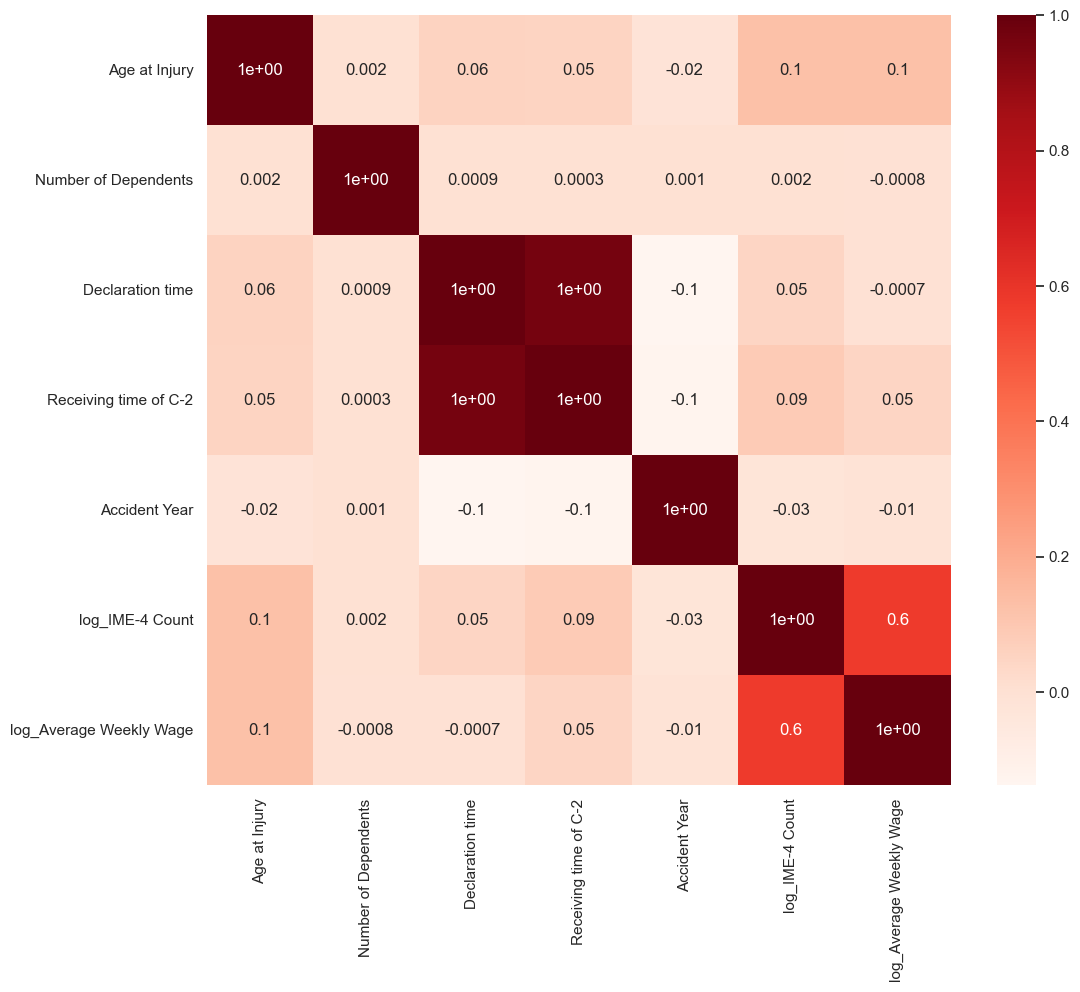

In [104]:
cor_heatmap(cor_spearman)

<a class="anchor" id="DT">
    
### 4.3 Decision Tree

</a>

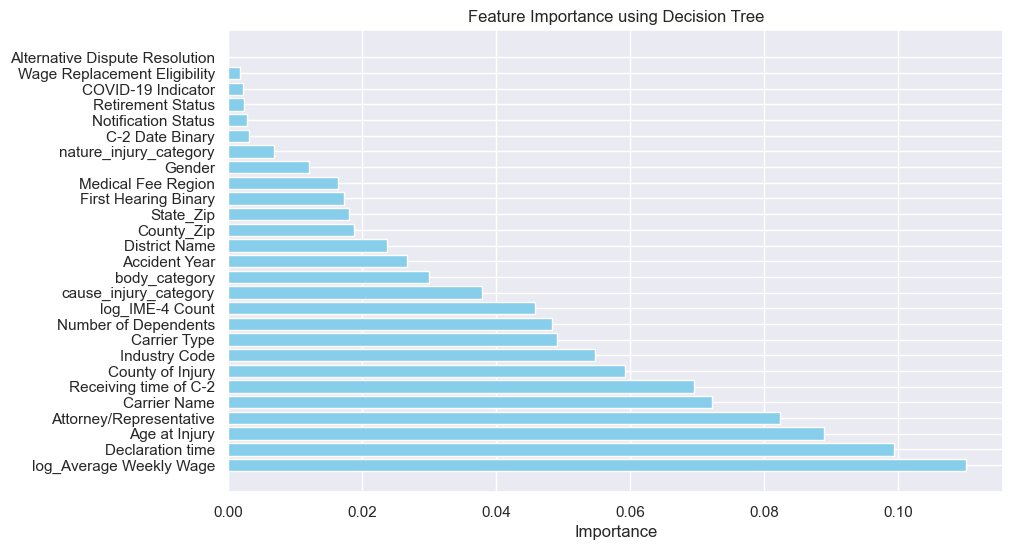

All Sorted Features by Importance:
log_Average Weekly Wage: 0.1102
Declaration time: 0.0994
Age at Injury: 0.0890
Attorney/Representative: 0.0823
Carrier Name: 0.0722
Receiving time of C-2: 0.0695
County of Injury: 0.0592
Industry Code: 0.0548
Carrier Type: 0.0491
Number of Dependents: 0.0483
log_IME-4 Count: 0.0458
cause_injury_category: 0.0379
body_category: 0.0300
Accident Year: 0.0267
District Name: 0.0238
County_Zip: 0.0189
State_Zip: 0.0180
First Hearing Binary: 0.0172
Medical Fee Region: 0.0164
Gender: 0.0120
nature_injury_category: 0.0068
C-2 Date Binary: 0.0031
Notification Status: 0.0028
Retirement Status: 0.0024
COVID-19 Indicator: 0.0022
Wage Replacement Eligibility: 0.0018
Alternative Dispute Resolution: 0.0000

Important Features Selected (above threshold):
['Age at Injury', 'Attorney/Representative', 'Carrier Name', 'Carrier Type', 'County of Injury', 'Industry Code', 'Number of Dependents', 'Declaration time', 'Receiving time of C-2', 'log_IME-4 Count', 'log_Average Wee

In [105]:
column_names = X_train.columns  
threshold = len(X_train.columns)/1000


dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_scaled, y_train)
    
feature_importances = dt_model.feature_importances_
feature_importance_dict = dict(zip(column_names, feature_importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

important_features = [
        feature for feature, importance in feature_importance_dict.items() if importance > threshold
    ]
    
feature_names = [feature for feature, importance in sorted_features]
importances = [importance for feature, importance in sorted_features]
    
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance using Decision Tree')
plt.show()

print("All Sorted Features by Importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

print("\nImportant Features Selected (above threshold):")
print(important_features)

selected_columns_dt =  important_features

<a class="anchor" id="RF">
    
### 4.4 Random Forest

</a>

In [106]:
importances = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train).feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Select the top features
selected_columns_rf = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()
print("Top Features:", selected_columns_rf)

                           Feature  Importance
18         log_Average Weekly Wage    0.092472
13                Declaration time    0.087947
0                    Age at Injury    0.084764
14           Receiving time of C-2    0.080456
3                     Carrier Name    0.067811
17                 log_IME-4 Count    0.062613
9                    Industry Code    0.061303
5                 County of Injury    0.056860
2          Attorney/Representative    0.053170
16                   Accident Year    0.050787
11            Number of Dependents    0.048013
22           cause_injury_category    0.039566
24                   body_category    0.032425
4                     Carrier Type    0.027761
15            First Hearing Binary    0.027521
7                    District Name    0.027134
26                      County_Zip    0.018849
25                       State_Zip    0.018489
10              Medical Fee Region    0.017451
8                           Gender    0.013459
23          n

<a class="anchor" id="XGB">
    
### 4.5 XGBoosting

</a>

In [109]:
model = XGBClassifier(
    random_state=42,
    n_estimators=50,  
    max_depth=3,      
    use_label_encoder=False,
    eval_metric='mlogloss'  
)


model.fit(X_train_scaled, y_train)
importances_xgb = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Select the top features
selected_features_xgb = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()
print("Top Features:", selected_features_xgb)

                           Feature  Importance
2          Attorney/Representative    0.537144
16                   Accident Year    0.082616
4                     Carrier Type    0.081555
18         log_Average Weekly Wage    0.049717
15            First Hearing Binary    0.043142
17                 log_IME-4 Count    0.034171
13                Declaration time    0.030164
12                 C-2 Date Binary    0.025999
9                    Industry Code    0.021819
3                     Carrier Name    0.014937
7                    District Name    0.013894
25                       State_Zip    0.013522
0                    Age at Injury    0.009138
5                 County of Injury    0.008183
24                   body_category    0.007772
14           Receiving time of C-2    0.005464
6               COVID-19 Indicator    0.005461
23          nature_injury_category    0.004913
8                           Gender    0.004077
26                      County_Zip    0.003314
22           

<a class="anchor" id="RFE">
    
### 4.6 RFE

</a>

In [110]:
# Initialize variables
nf = len(X_train_scaled.columns)
nof_list = np.arange(1, nf+1)            
high_score = 0

# Variables to store the optimum features
nof = 0           
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    # Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
    X_val_rfe = rfe.transform(X_val_scaled)
    
    # Fit the model on training data
    model.fit(X_train_rfe, y_train)
    
    # Predictions for F1 Macro scores
    train_preds = model.predict(X_train_rfe)
    val_preds = model.predict(X_val_rfe)
    
    # Calculate F1 Macro scores
    train_f1_macro = f1_score(y_train, train_preds, average='macro')
    val_f1_macro = f1_score(y_val, val_preds, average='macro')
    
    train_score_list.append(train_f1_macro)
    val_score_list.append(val_f1_macro)
    
    # Check best score
    if val_f1_macro >= high_score:
        high_score = val_f1_macro
        nof = nof_list[n]
        
        #adding mention of variables to keep
        selected_features_rfe_lr = pd.Series(rfe.support_, index = X_train_scaled.columns)



# Display results
print("Training F1 Macro Scores:", train_score_list)
print("Validation F1 Macro Scores:", val_score_list)
print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{selected_features_rfe_lr}")

Training F1 Macro Scores: [0.5210666157768911, 0.5183858109052155, 0.5184261225490558, 0.5303999701878023, 0.5334235273796194, 0.5298727873846226, 0.5334553337512613, 0.5386051488312836, 0.5377086729763014, 0.534527123141165, 0.5345955530132558, 0.5349332598468988, 0.5340660923153304, 0.5340834467444473, 0.5405826858770546, 0.5363899104851546, 0.5356940087664308, 0.5428121096911387, 0.5370444480638272, 0.5406116977455174, 0.5415299357133667, 0.5375758982677863, 0.5361668253950149, 0.5351869110021947, 0.5357849500025191, 0.5360114309324098, 0.5362698259816335]
Validation F1 Macro Scores: [0.5204167821256476, 0.5177945940446248, 0.5181632280290547, 0.5279124614645057, 0.531796000790859, 0.5282775675891282, 0.5293377542449968, 0.5352954499664564, 0.5368847976896645, 0.5313285640819684, 0.5316884840717988, 0.5316729770217269, 0.532118312444608, 0.5319697944883348, 0.5408961552098727, 0.5353761411647918, 0.5351221175991496, 0.5436976114891254, 0.5365603088185444, 0.5398015179764094, 0.54132

In [111]:
# Extract only the features to keep (True values)
features_to_keep = selected_features_rfe_lr[selected_features_rfe_lr].index
selected_features_rfe_lr = features_to_keep.tolist()
# Display the selected features
print("Selected Features to Keep:")
print(selected_features_rfe_lr)


Selected Features to Keep:
['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type', 'COVID-19 Indicator', 'Gender', 'Industry Code', 'Medical Fee Region', 'C-2 Date Binary', 'Declaration time', 'Receiving time of C-2', 'First Hearing Binary', 'Accident Year', 'log_IME-4 Count', 'log_Average Weekly Wage', 'Wage Replacement Eligibility', 'State_Zip']


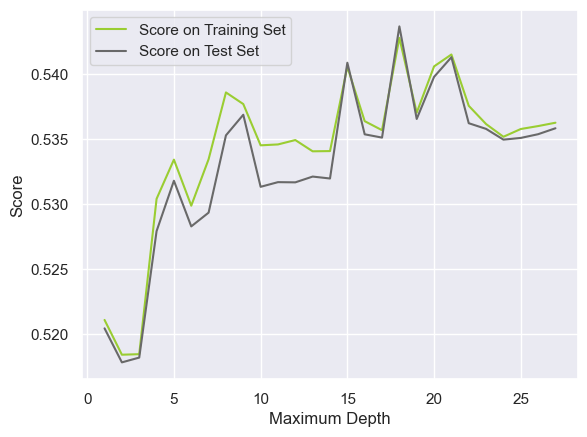

In [112]:
plt.plot(list(range(1,nf+1)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,nf+1)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

<a class="anchor" id="LASSO">
    
### 4.7 LASSO

</a>

In [113]:
# Ensure X_train_num_2_scaled is a DataFrame with columns from X_train_num_2
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

# Fit the LassoCV model
reg = LassoCV()
reg.fit(X_train_num_scaled_df, y_train)

# Create a Series of coefficients with column names as the index
coef = pd.Series(reg.coef_, index=X_train_num.columns)

selected_features_lasso = coef[coef != 0].index.tolist()

# Display the coefficients
print(coef)

Age at Injury             -0.007338
Number of Dependents      -0.000442
Declaration time           1.201944
Receiving time of C-2     -1.259723
Accident Year             -0.932951
log_IME-4 Count            0.410493
log_Average Weekly Wage   -0.005891
dtype: float64


In [114]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 0 variables


<a class="anchor" id="importantvariablesFS">
    
### 4.8 Important Variables from Feature Selection

</a>

In [115]:
important_features_chi2 = set(selected_columns_chi2)
important_features_rf = set(selected_columns_rf)  
important_features_dt = set(selected_columns_dt)
important_features_rfe = set(selected_features_rfe_lr)
important_features_lasso = set(selected_features_lasso)
important_features_xgb = set(selected_features_xgb) 

# Combine all features to count appearances
all_important_features = (
    list(important_features_chi2) +
    list(important_features_rf) +
    list(important_features_dt) +
    list(important_features_rfe) +
    list(important_features_lasso) +
    list(important_features_xgb)
)
feature_counts = Counter(all_important_features)

# Set a threshold for how many methods a feature needs to appear in to be selected
threshold = 2  
selected_features = [feature for feature, count in feature_counts.items() if count >= threshold]

print("Features Selected (Appeared in >= {} Methods):".format(threshold))
print(selected_features)

Features Selected (Appeared in >= 2 Methods):
['Carrier Type', 'C-2 Date Binary', 'State_Zip', 'body_category', 'District Name', 'Alternative Dispute Resolution', 'Gender', 'Industry Code', 'COVID-19 Indicator', 'Wage Replacement Eligibility', 'Attorney/Representative', 'cause_injury_category', 'First Hearing Binary', 'County of Injury', 'Carrier Name', 'Medical Fee Region', 'log_Average Weekly Wage', 'Receiving time of C-2', 'Number of Dependents', 'Age at Injury', 'Accident Year', 'Declaration time', 'log_IME-4 Count']


> As 'Receiving time of C-2' and 'Declaration time' have a high correlation (>0.8) we should drop one of them.
> Based on the other feature selection like decision tree, random forest and xgboosting 'Receiving time of C-2' is more important, so we decided to drop 'Declaration time'

In [117]:
#Selection 
selected_features =['Carrier Type', 'C-2 Date Binary', 'State_Zip', 'body_category', 'District Name', 
                    'Alternative Dispute Resolution', 'Gender', 'Industry Code', 'COVID-19 Indicator', 
                    'Wage Replacement Eligibility', 'Attorney/Representative', 'cause_injury_category', 
                    'First Hearing Binary', 'County of Injury', 'Carrier Name', 'Medical Fee Region', 
                    'log_Average Weekly Wage', 'Receiving time of C-2', 'Number of Dependents', 'Age at Injury', 
                    'Accident Year', 'log_IME-4 Count']

In [118]:
len(selected_features)

22

<a class="anchor" id="Modelling">
    
## 5. Modelling

</a>

In [119]:
column_names = X_train.columns
column_names

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'Number of Dependents',
       'C-2 Date Binary', 'Declaration time', 'Receiving time of C-2',
       'First Hearing Binary', 'Accident Year', 'log_IME-4 Count',
       'log_Average Weekly Wage', 'Wage Replacement Eligibility',
       'Retirement Status', 'Notification Status', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip'],
      dtype='object')

In [120]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=column_names)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=column_names)

In [121]:
#common_features = [feature for feature in selected_features if feature in X_train_scaled_df.columns]

X_train_selected = X_train_scaled_df[selected_features]
X_val_selected = X_val_scaled_df[selected_features]

# Display the shapes of the modified datasets to confirm alignment
print("X_train with selected features shape:", X_train_selected.shape)
print("X_val with selected features shape:", X_val_selected.shape)

X_train with selected features shape: (405140, 22)
X_val with selected features shape: (143507, 22)


In [122]:
y_train_series = pd.Series(y_train)

class_distribution_train = y_train_series.value_counts(normalize=True)


print("Class distribution in training set:")
print(class_distribution_train)

Class distribution in training set:
0    0.953493
1    0.046507
Name: proportion, dtype: float64


<a class="anchor" id="modelassement">
    
### 5.1. Models Assessment

</a>


In [124]:
# Dictionary to store results for each model
results_val = {}
results_train = {}
overfitting_results = {}
models = []

def evaluate_model(model, model_name):
    model.fit(X_train_selected, y_train)
    models.append(model)
    
    # Predictions and metrics for validation set
    y_pred_val = model.predict(X_val_selected)
    y_prob_val = model.predict_proba(X_val_selected) if hasattr(model, "predict_proba") else None

    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_precision = precision_score(y_val, y_pred_val, average='weighted')
    val_recall = recall_score(y_val, y_pred_val, average='weighted')
    val_f1 = f1_score(y_val, y_pred_val, average='macro')
    val_conf_matrix = confusion_matrix(y_val, y_pred_val)

    # Validation AUC
    if y_prob_val is not None and len(np.unique(y_val)) > 2:
        val_auc = roc_auc_score(y_val, y_prob_val, multi_class='ovr', average='macro')
    elif y_prob_val is not None:
        val_auc = roc_auc_score(y_val, y_prob_val[:, 1])  # Binary classification
    else:
        val_auc = None

    # Store validation results
    results_val[model_name] = {
        'Accuracy': val_accuracy,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1 Score': val_f1,
        'Confusion Matrix': val_conf_matrix,
        'ROC AUC': val_auc if val_auc is not None else 'Not applicable'
    }

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f"{model_name} - Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}")
    if val_auc is not None:
        print(f"{model_name} - ROC AUC: {val_auc:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{val_conf_matrix}\n")
    print(f"Classification Report for {model_name}:\n{classification_report(y_val, y_pred_val)}\n")
    
    # Predictions and metrics for training set
    y_pred_train = model.predict(X_train_selected)
    y_prob_train = model.predict_proba(X_train_selected) if hasattr(model, "predict_proba") else None

    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='macro')
    train_conf_matrix = confusion_matrix(y_train, y_pred_train)

    # Training AUC
    if y_prob_train is not None and len(np.unique(y_train)) > 2:
        train_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr', average='macro')
    elif y_prob_train is not None:
        train_auc = roc_auc_score(y_train, y_prob_train[:, 1])  # Binary classification
    else:
        train_auc = None

    # Store training results
    results_train[model_name] = {
        'Accuracy': train_accuracy,
        'Precision': train_precision,
        'Recall': train_recall,
        'F1 Score': train_f1,
        'Confusion Matrix': train_conf_matrix,
        'ROC AUC': train_auc if train_auc is not None else 'Not applicable'
    }

    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f"{model_name} - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
    if train_auc is not None:
        print(f"{model_name} - ROC AUC: {train_auc:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{train_conf_matrix}\n")
    print(f"Classification Report for {model_name}:\n{classification_report(y_train, y_pred_train)}\n")
    
    # Overfitting calculation
    overfitting_results[model_name] = {
        'Accuracy Gap': train_accuracy - val_accuracy,
        'F1 Score Gap': train_f1 - val_f1,
        'Precision Gap': train_precision - val_precision,
        'Recall Gap': train_recall - val_recall
    }
    
    print('___________________________________________________________________________________________________________')
    print('                                                 OVERFITTING                                               ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f"{model_name} - Accuracy Gap: {train_accuracy - val_accuracy:.4f}")
    print(f"{model_name} - F1 Score Gap: {train_f1 - val_f1:.4f}")
    print(f"{model_name} - Precision Gap: {train_precision - val_precision:.4f}")
    print(f"{model_name} - Recall Gap: {train_recall - val_recall:.4f}\n")


<a class="anchor" id="models">
    
### 5.2 Models

</a>

In [125]:
# 1. Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, 
                                    random_state=42)
evaluate_model(logistic_model, "Logistic Regression") 



___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Logistic Regression - Accuracy: 0.9538, Precision: 0.9366, Recall: 0.9538, F1 Score: 0.5376
Logistic Regression - ROC AUC: 0.9034
Confusion Matrix for Logistic Regression:
[[136508    302]
 [  6333    364]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    136810
           1       0.55      0.05      0.10      6697

    accuracy                           0.95    143507
   macro avg       0.75      0.53      0.54    143507
weighted avg       0.94      0.95      0.94    143507


_____________________________________________________________________________________________

In [126]:
# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
evaluate_model(dt_model, "Decision Tree Classifier") 



___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Decision Tree Classifier - Accuracy: 0.9358, Precision: 0.9340, Recall: 0.9358, F1 Score: 0.6293
Decision Tree Classifier - ROC AUC: 0.6257
Confusion Matrix for Decision Tree Classifier:
[[132399   4411]
 [  4797   1900]]

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    136810
           1       0.30      0.28      0.29      6697

    accuracy                           0.94    143507
   macro avg       0.63      0.63      0.63    143507
weighted avg       0.93      0.94      0.93    143507


_________________________________________________________________________

In [127]:
# 3. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, 
                                  random_state=42        
                                  )

evaluate_model(rf_model, "Random Forest Classifier") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Random Forest Classifier - Accuracy: 0.9566, Precision: 0.9470, Recall: 0.9566, F1 Score: 0.5880
Random Forest Classifier - ROC AUC: 0.9306
Confusion Matrix for Random Forest Classifier:
[[136501    309]
 [  5926    771]]

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    136810
           1       0.71      0.12      0.20      6697

    accuracy                           0.96    143507
   macro avg       0.84      0.56      0.59    143507
weighted avg       0.95      0.96      0.94    143507


_________________________________________________________________________

In [131]:
# 4. MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
evaluate_model(mlp_model, "Neural Network") 


___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Neural Network - Accuracy: 0.9556, Precision: 0.9440, Recall: 0.9556, F1 Score: 0.5745
Neural Network - ROC AUC: 0.9273
Confusion Matrix for Neural Network:
[[136477    333]
 [  6036    661]]

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    136810
           1       0.66      0.10      0.17      6697

    accuracy                           0.96    143507
   macro avg       0.81      0.55      0.57    143507
weighted avg       0.94      0.96      0.94    143507


___________________________________________________________________________________________________________
     

In [132]:
# 5. GaussianNB
nb_model = GaussianNB()
evaluate_model(nb_model, "Naive Bayes")

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Naive Bayes - Accuracy: 0.7110, Precision: 0.9547, Recall: 0.7110, F1 Score: 0.5264
Naive Bayes - ROC AUC: 0.8609
Confusion Matrix for Naive Bayes:
[[95814 40996]
 [  478  6219]]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82    136810
           1       0.13      0.93      0.23      6697

    accuracy                           0.71    143507
   macro avg       0.56      0.81      0.53    143507
weighted avg       0.95      0.71      0.79    143507


___________________________________________________________________________________________________________
                     

In [133]:
# 6. XGBClassifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),  
    n_estimators=100,
    use_label_encoder=False, 
    eval_metric='mlogloss',   
    random_state = 42,
 )

# Evaluate the initial model
evaluate_model(xgb_model, "XGBoost") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
XGBoost - Accuracy: 0.9568, Precision: 0.9458, Recall: 0.9568, F1 Score: 0.6261
XGBoost - ROC AUC: 0.9369
Confusion Matrix for XGBoost:
[[136136    674]
 [  5525   1172]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    136810
           1       0.63      0.18      0.27      6697

    accuracy                           0.96    143507
   macro avg       0.80      0.59      0.63    143507
weighted avg       0.95      0.96      0.94    143507


___________________________________________________________________________________________________________
                                 

In [135]:
# Summary of model performance for comparison
summary_df = pd.DataFrame({model: metrics for model, metrics in results_val.items()}).T[['Accuracy', 'F1 Score']]
print("\nSummary of Model Performance:")
print(summary_df)


Summary of Model Performance:
                          Accuracy  F1 Score
Logistic Regression       0.953765  0.537573
Decision Tree Classifier  0.935836  0.629261
Random Forest Classifier  0.956553  0.587974
XGBoost                   0.956804  0.626058
Naive Bayes               0.710997  0.526394
Neural Network            0.955619  0.574544


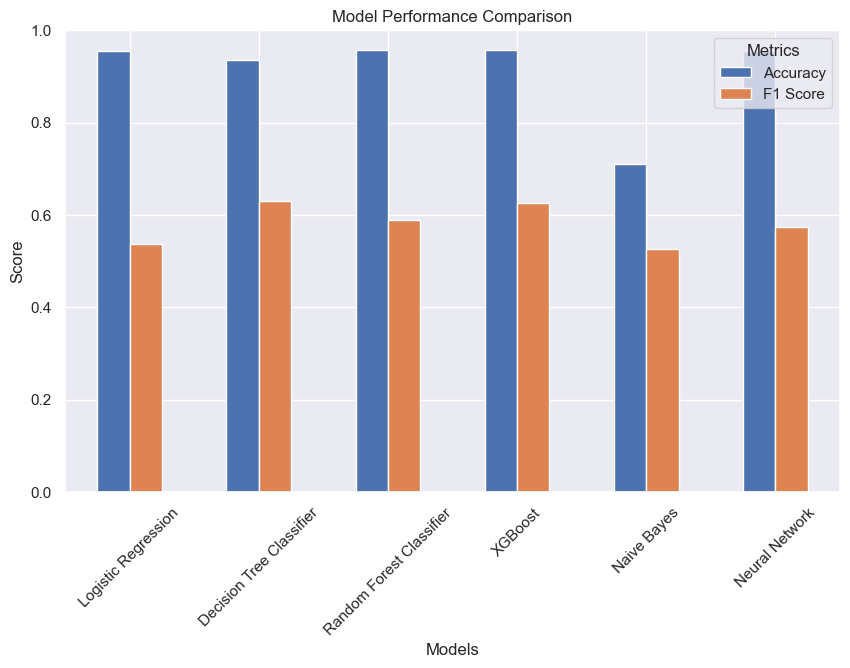

In [136]:
# Plotting the bar chart for model comparison
summary_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.ylim(0, 1)  
plt.show()

<a class="anchor" id="hypertunnyng">
    
### 5.4 Best Models Hyperparameters Tuning

</a>

In [163]:
%%capture
'''
# Combine train and validation datasets
X_combined = np.concatenate([X_train_selected, X_val_selected ])
y_combined = np.concatenate([y_train, y_val])

# Create a test fold index (-1 for train, 0 for validation)
test_fold = [-1] * len(X_train_selected ) + [0] * len(X_val_selected)

print('Test fold: ', len(test_fold))
print('X_combined: ', len(X_combined))
print('y_combined: ', len(y_combined))

# Define the PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)
'''

In [164]:
%%capture
'''
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False],             
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier(random_state = 42)

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1_macro',        
    cv=ps,                      
    verbose=2,                 
    n_jobs=-1                  
)

grid_search_rf.fit(X_combined, y_combined)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_

evaluate_model(best_rf_model, "Random Forest (Best Parameters)")
'''

In [165]:
%%capture
'''
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 150, 200],         
    'max_depth': [3, 5, 10],                
    'learning_rate': [0.01, 0.1, 0.2],      
    'subsample': [0.8, 1.0],                
    'colsample_bytree': [0.6, 0.8, 1.0],         
    'gamma': [0, 1, 5],                     
    'reg_alpha': [0, 0.1, 1],              
    'reg_lambda': [1, 10, 100]              
}


# Set up the GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',        
    cv= ps,                      
    verbose=2,                 
    n_jobs=-1                  
)

# Perform the grid search
grid_search_xgb.fit(X_combined, y_combined)


# Output the best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validation Score:", grid_search_xgb.best_score_)

# Train the final XGBoost model with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the final model on the validation set
evaluate_model(best_xgb_model, " XGBoost (Best Parameters)")

'''

In [137]:
# Best Random Forest Classifier
best_rf_model_1 = RandomForestClassifier(n_estimators=300, 
                                  random_state=42,       
                                  max_depth = 20,    
                                  min_samples_split= 10,        
                                  min_samples_leaf = 4,          
                                  max_features = None, 
                                  bootstrap =True,              
                                  criterion = 'entropy')

evaluate_model(best_rf_model_1, "Random Forest Classifier") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
Random Forest Classifier - Accuracy: 0.9566, Precision: 0.9464, Recall: 0.9566, F1 Score: 0.5959
Random Forest Classifier - ROC AUC: 0.9340
Confusion Matrix for Random Forest Classifier:
[[136429    381]
 [  5848    849]]

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    136810
           1       0.69      0.13      0.21      6697

    accuracy                           0.96    143507
   macro avg       0.82      0.56      0.60    143507
weighted avg       0.95      0.96      0.94    143507


_________________________________________________________________________

In [138]:
# Best XGBClassifier
best_xgb_model_1 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),  
    n_estimators=200,
    use_label_encoder=False,  
    eval_metric='mlogloss',   
    random_state = 42,
    max_depth =  10,
    learning_rate =  0.2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    gamma = 1,
    reg_alpha = 0.1,
    reg_lambda = 1,

)

evaluate_model(best_xgb_model_1, "XGBoost") 

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
XGBoost - Accuracy: 0.9570, Precision: 0.9462, Recall: 0.9570, F1 Score: 0.6332
XGBoost - ROC AUC: 0.9387
Confusion Matrix for XGBoost:
[[136086    724]
 [  5446   1251]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    136810
           1       0.63      0.19      0.29      6697

    accuracy                           0.96    143507
   macro avg       0.80      0.59      0.63    143507
weighted avg       0.95      0.96      0.95    143507


___________________________________________________________________________________________________________
                                 

<a class="anchor" id="predictions">
    
## 6. Predictions

</a>

In [139]:
label_mapping = {
    0: '1. CANCELLED',
    1: '2. NON-COMP',
    2: '3. MED ONLY',
    3: '4. TEMPORARY',
    4: '5. PPD SCH LOSS',
    5: '6. PPD NSL',
    6: '7. PTD',
    7: '8. DEATH'
}

selected_model = best_xgb_model_1
expected_features = selected_model.feature_names_in_  

test_col = test_scaled[expected_features]          
test_col['Claim Injury Type'] = selected_model.predict(test_col)
predictions = test_col['Claim Injury Type']

predictions_decoded = [label_mapping[pred] for pred in predictions]

submission = pd.DataFrame({
    "Claim Identifier": test["Claim Identifier"],  
    "Claim Injury Type": predictions_decoded       
})

submission = submission.sort_values(by="Claim Identifier").reset_index(drop=True)

submission.to_csv('Agreement_Reached_test_1.csv', index=False)